<a href="https://colab.research.google.com/github/nasarar/Post_Covid19_Vacation_Projection/blob/main/pcvplanner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

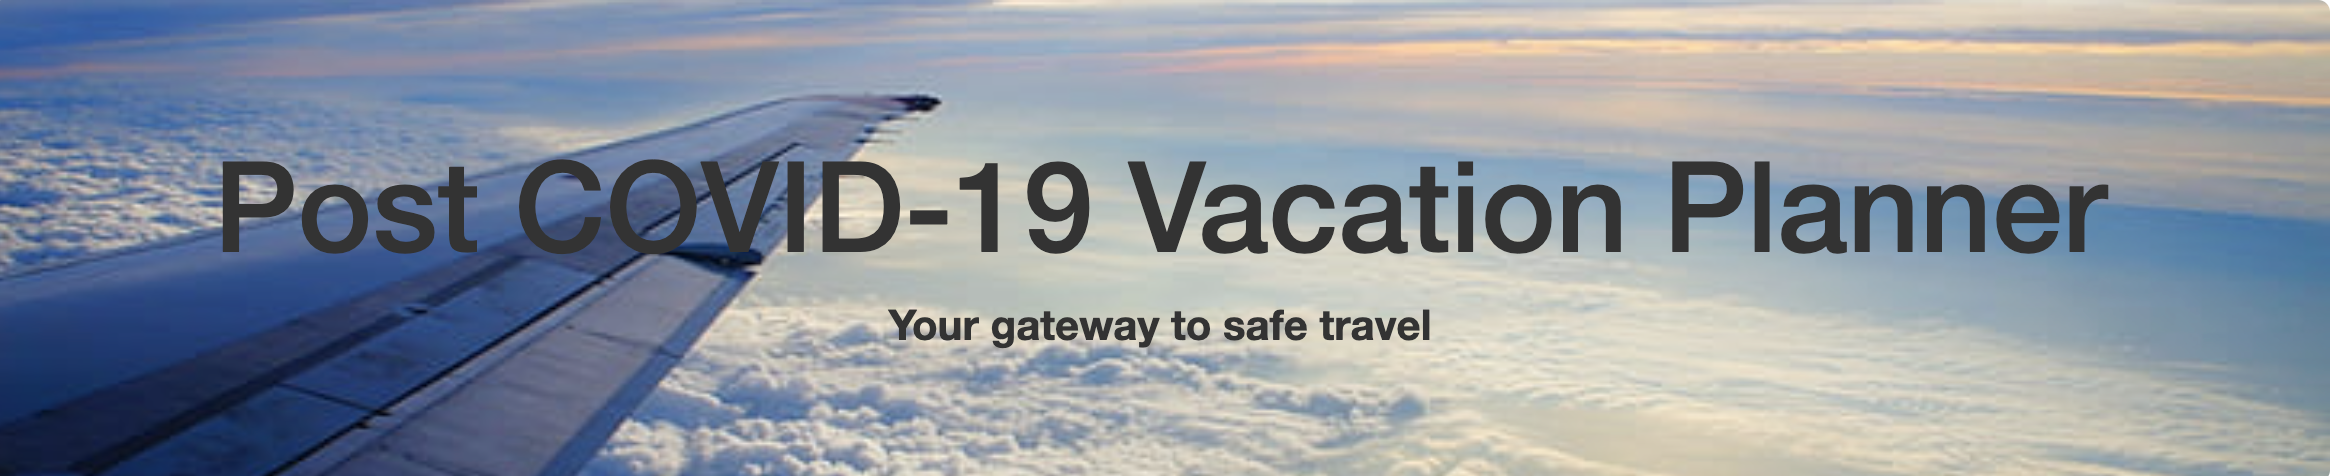

In [8]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 0

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

In [9]:
import datetime
from dateutil.parser import parse
import matplotlib.pyplot as plt
import pandas as pd

# Data Collection : Source - https://covid.ourworldindata.org/

In [10]:
import pandas as pd

#load dataset
pcv= pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
print('Shape of data',pcv.shape)
pcv.head()
pcv

Shape of data (94657, 60)


iso_code continent  ... human_development_index excess_mortality
0          AFG      Asia  ...                   0.511              NaN
1          AFG      Asia  ...                   0.511              NaN
2          AFG      Asia  ...                   0.511              NaN
3          AFG      Asia  ...                   0.511              NaN
4          AFG      Asia  ...                   0.511              NaN
...        ...       ...  ...                     ...              ...
94652      ZWE    Africa  ...                   0.571              NaN
94653      ZWE    Africa  ...                   0.571              NaN
94654      ZWE    Africa  ...                   0.571              NaN
94655      ZWE    Africa  ...                   0.571              NaN
94656      ZWE    Africa  ...                   0.571              NaN

[94657 rows x 60 columns]

In [11]:
pd.options.display.max_seq_items = 230

# ARIMA Model process & Dependencies 

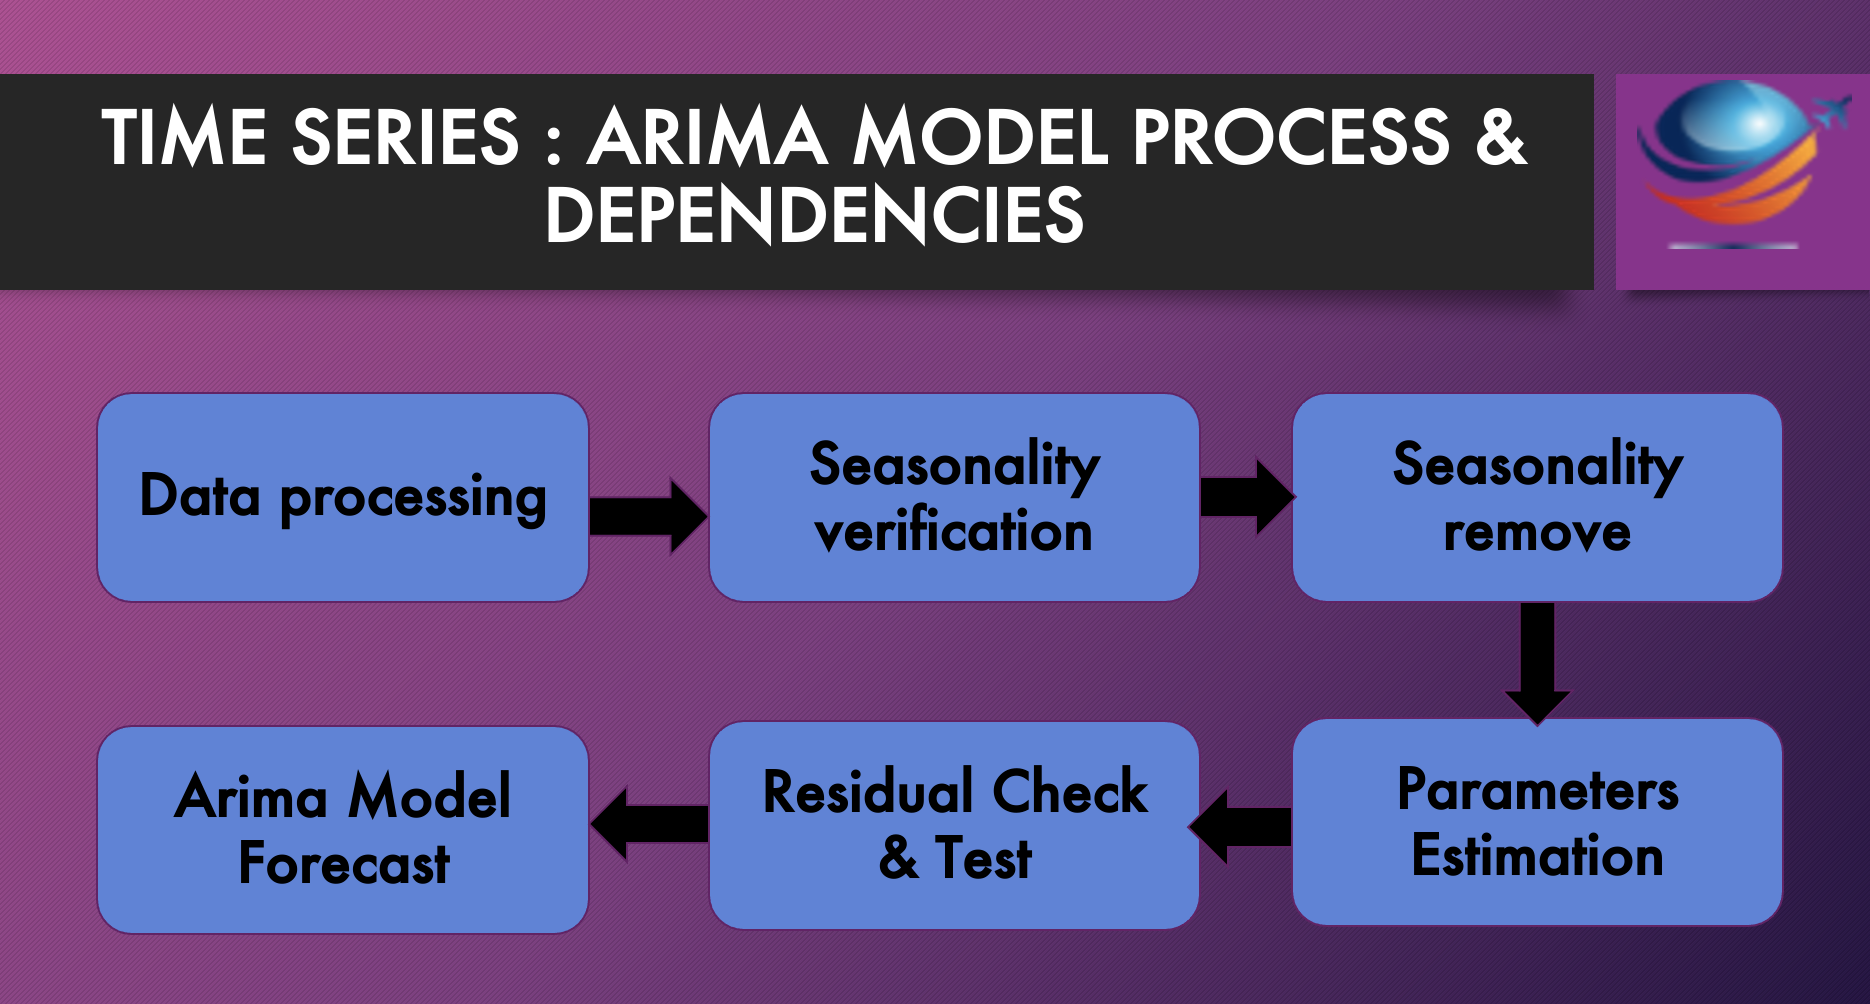

In [12]:
!pip install pmdarima 

## Import Dependencies 

In [13]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

# Best Model chosen is : ARIMA (p,d,q) = ARIMA(7,0,0) & Plots

### Adding Lag to stabilize different gaps between two doses

### Two order differencing for making Timeseries stationary

### Creating master data set : world_data_forecast.csv

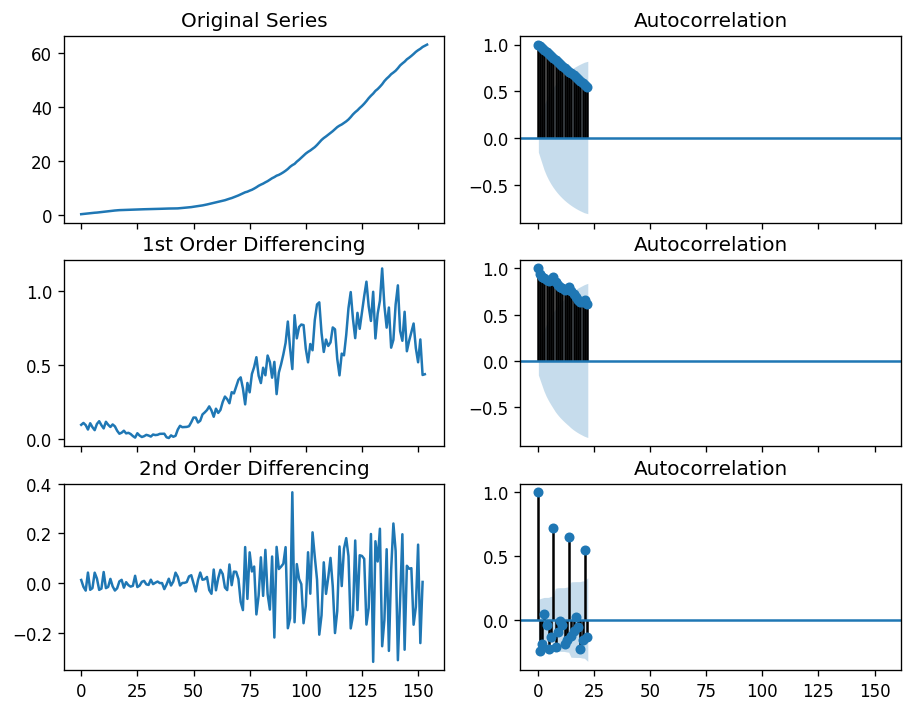

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-264.762, Time=0.34 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-240.109, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-247.490, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-258.186, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-242.044, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-264.524, Time=0.48 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-270.301, Time=0.45 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-266.722, Time=0.20 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-269.973, Time=0.58 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-269.711, Time=0.54 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-264.826, Time=0.26 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=-290.143, Time=0.67 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=-298.484, Time=0.71 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-267.482, Time=0.64 sec
 ARIMA(4,2,3)(0,0,0)[0] intercept

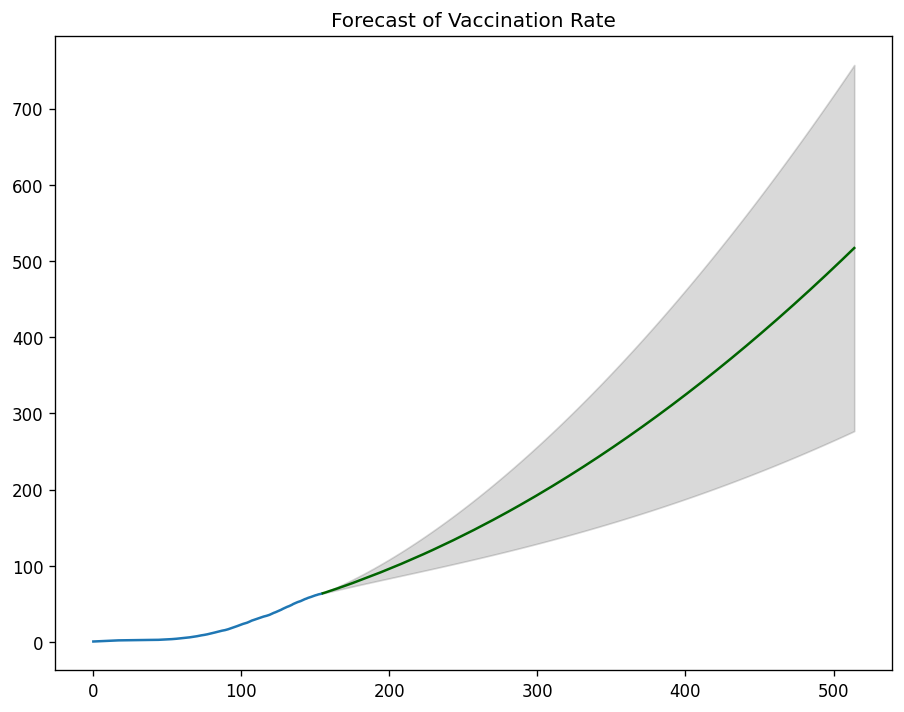

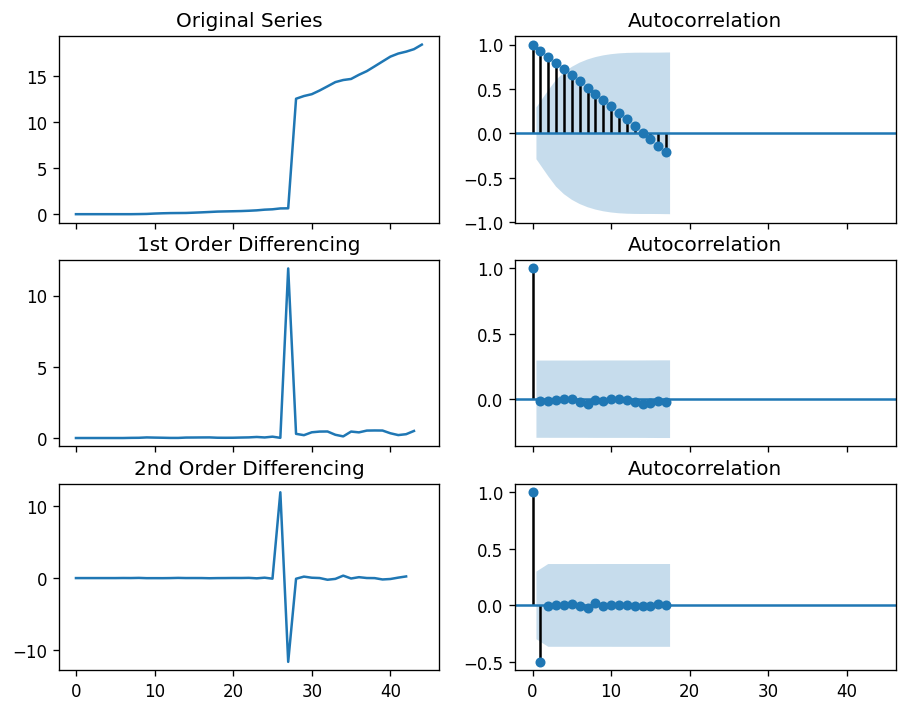

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=206.029, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=195.997, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=204.030, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=192.925, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=192.127, Time=0.04 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=192.448, Time=0.06 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=190.132, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=190.928, Time=0.02 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=190.455, Time=0.04 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=185.414, Time=0.13 sec
 A

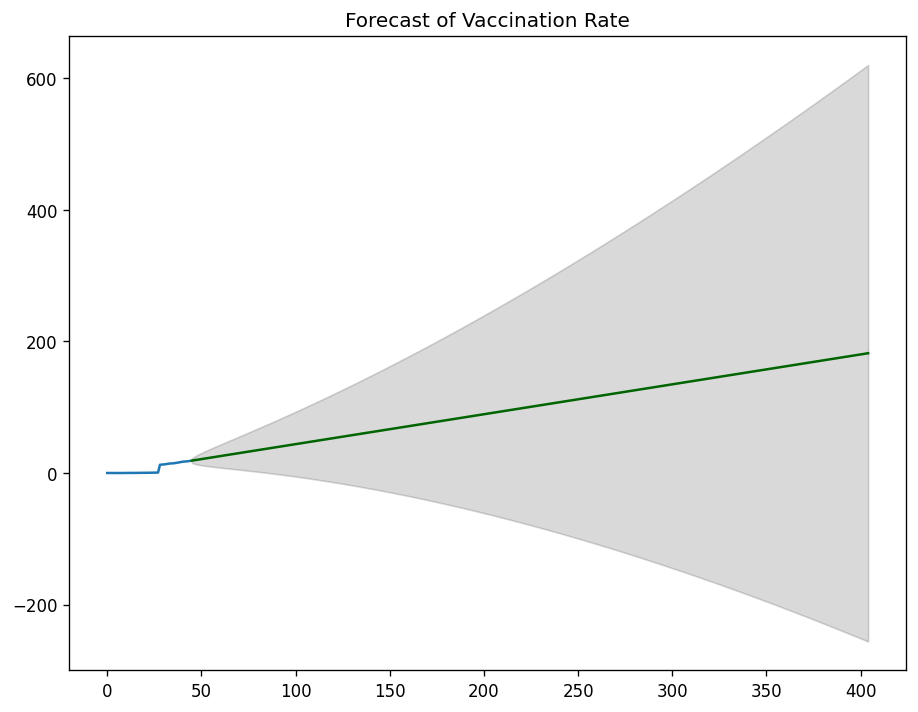

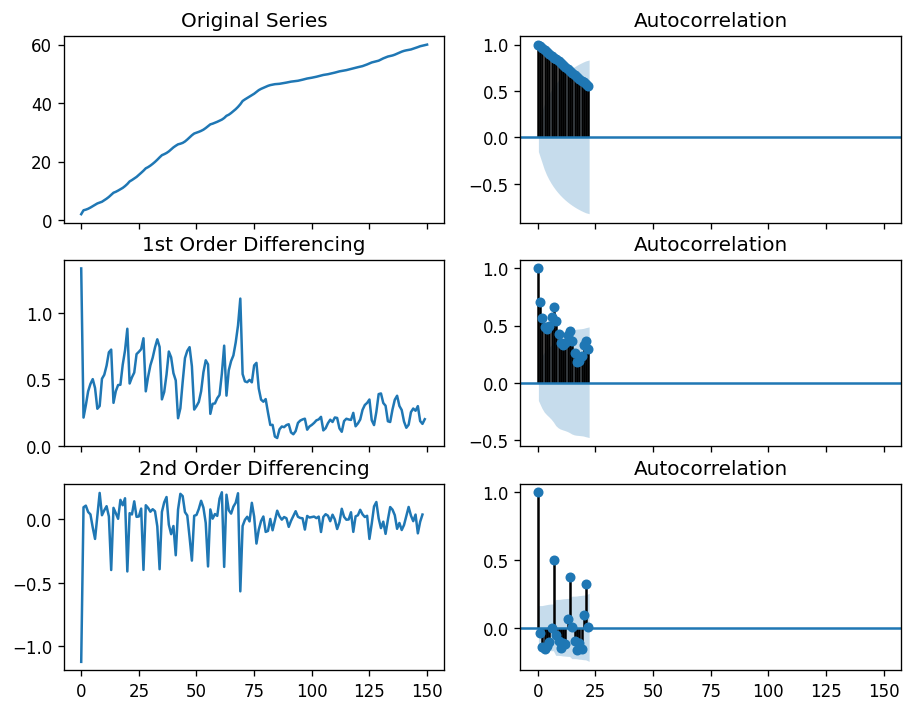

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-127.127, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-125.498, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-125.859, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-128.773, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.918 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  151
Model:               SARIMAX(0, 2, 0)   Log Likelihood                  65.386
Date:                Thu, 10 Jun 2021   AIC                           -128.773
Time:                        22:51:11   BIC                           -125.769
Sample:                             0   HQIC                          -127.552
                                - 151                                         
Co

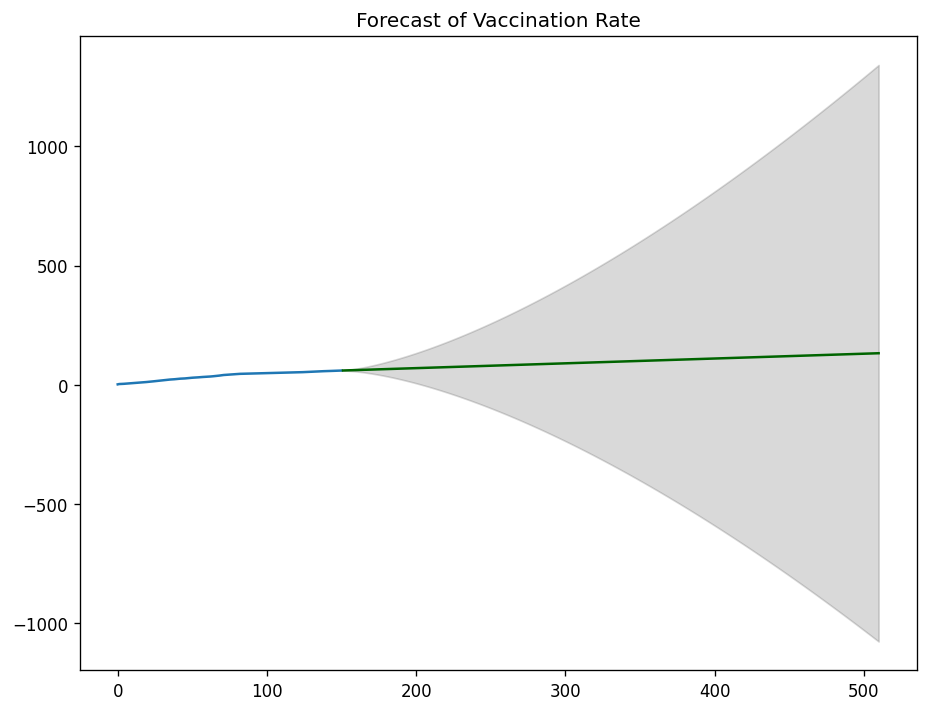

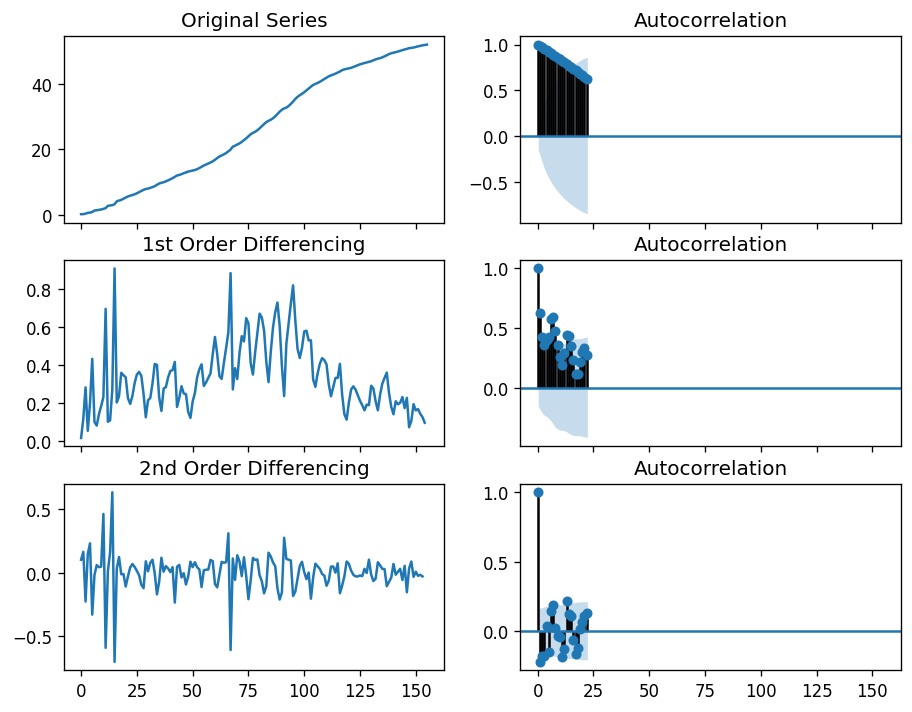

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-191.956, Time=0.37 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-152.587, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-158.243, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-182.903, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-154.585, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-192.562, Time=0.42 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-194.486, Time=0.21 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-192.734, Time=0.28 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-194.114, Time=0.56 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-196.481, Time=0.12 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-184.902, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-194.557, Time=0.16 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-194.729, Time=0.13 sec
 ARIMA(1,2,1)(0,0,0)[0]             : 

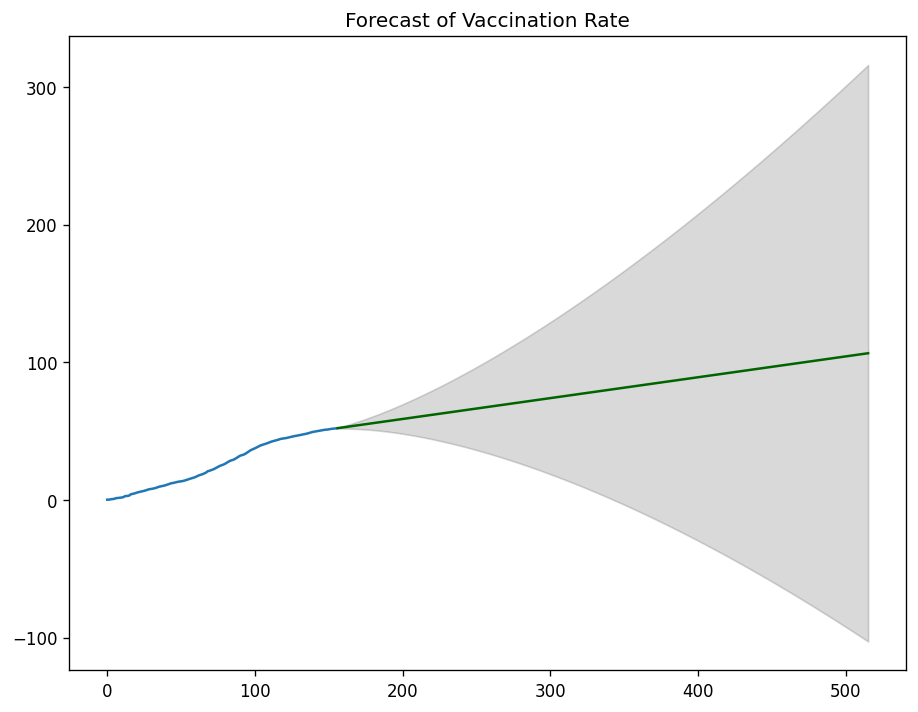

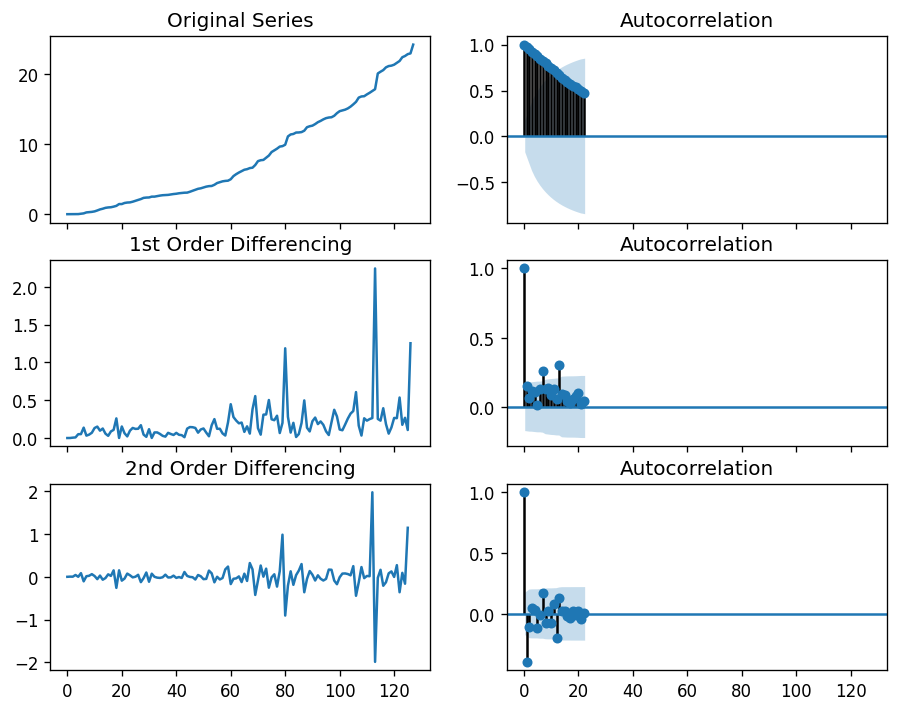

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12.029, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20.168, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18.740, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18.980, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=73.545, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14.750, Time=0.39 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13.986, Time=0.42 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=20.865, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=20.553, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=11.692, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=55.239, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=44.865, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=13.627, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=13.610, Time=0.22 sec


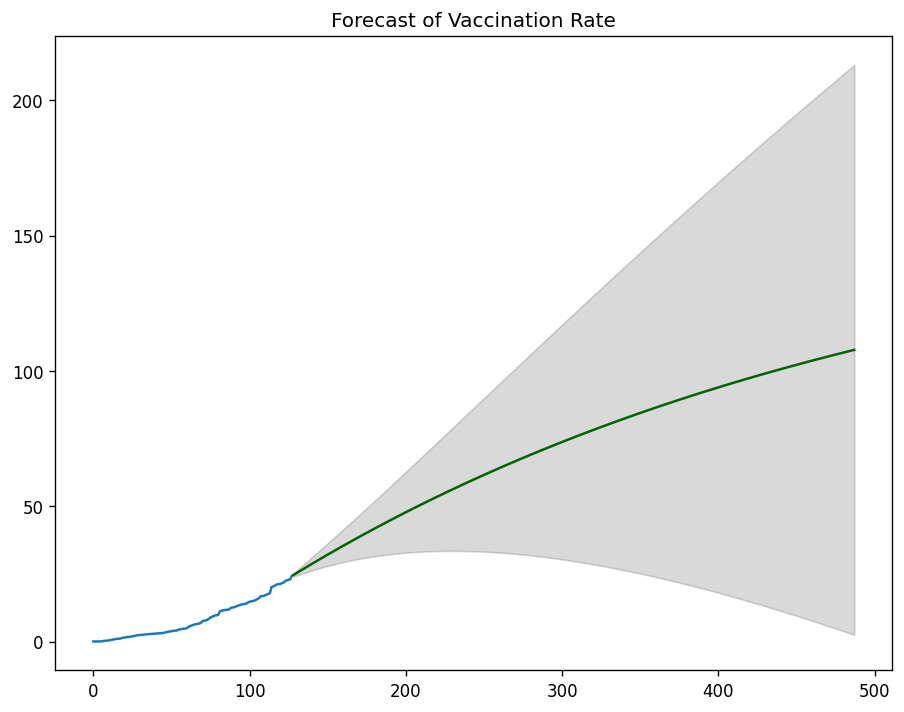

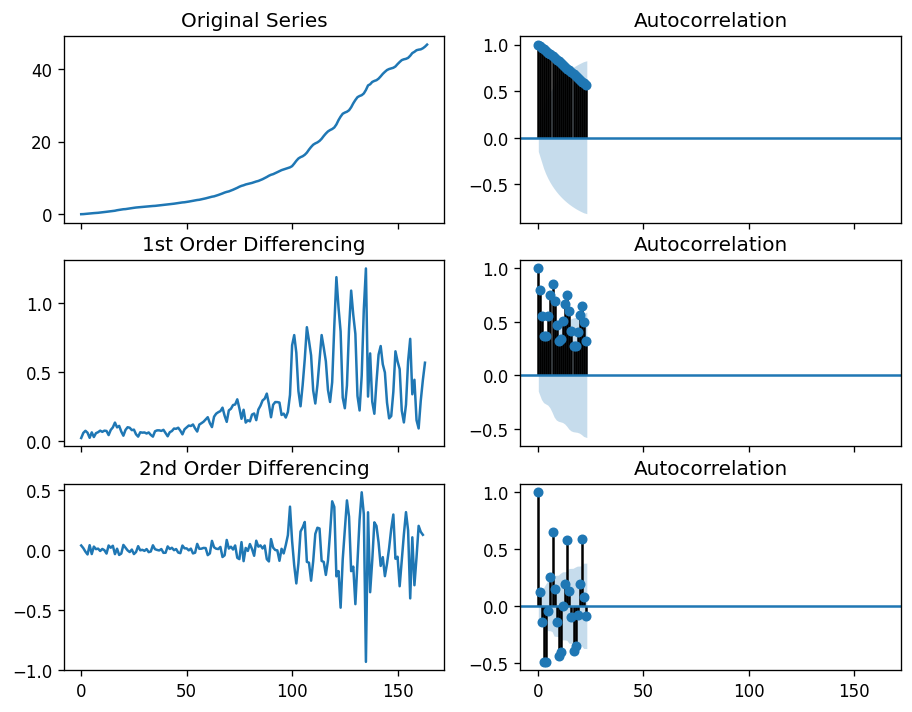

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-126.116, Time=0.21 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-126.833, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-127.552, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-128.095, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-128.763, Time=0.03 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.473 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  165
Model:               SARIMAX(0, 2, 0)   Log Likelihood                  65.381
Date:                Thu, 10 Jun 2021   AIC                           -128.763
Time:                        22:51:24   BIC                           -125.669
Sample:                             0   HQIC                          -127.507
                                - 165                                       

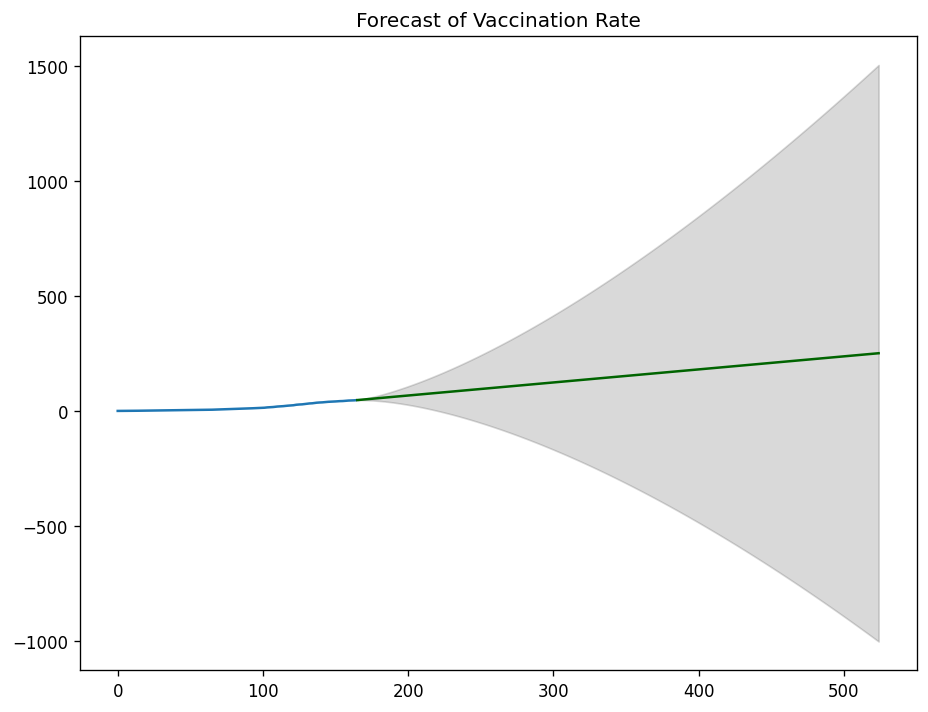

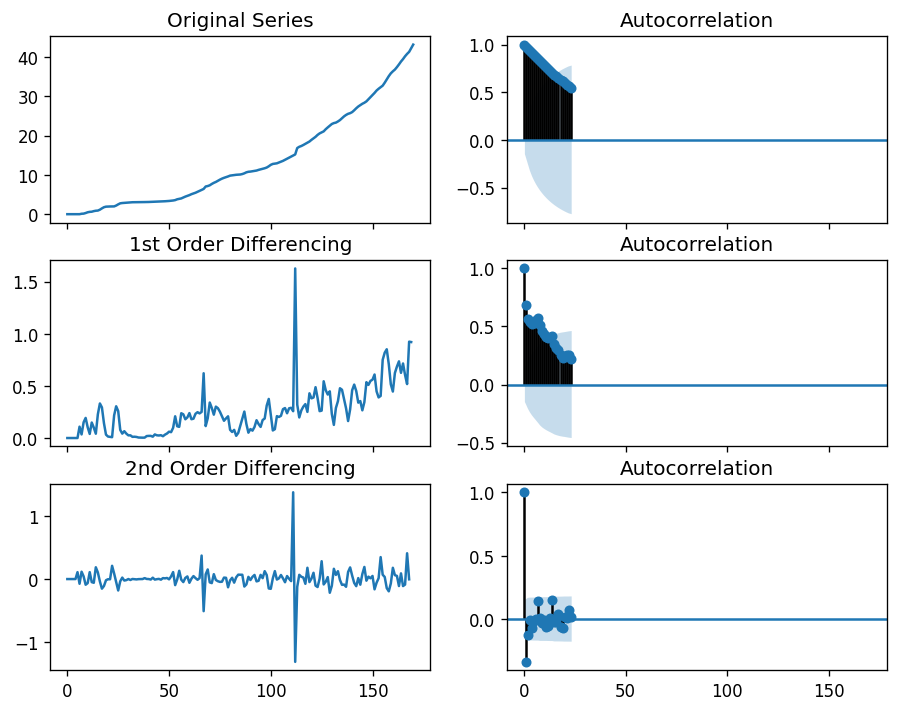

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-155.983, Time=0.26 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-99.520, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-117.858, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-152.088, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-101.362, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-155.347, Time=0.24 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-154.897, Time=0.36 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-156.826, Time=0.37 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-154.936, Time=0.38 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-157.761, Time=0.63 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=-155.193, Time=0.71 sec
 ARIMA(1,2,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(0,2,4)(0,0,0)[0] intercept   : AIC=-153.863, Time=0.65 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-152.797, Time=0.36 sec
 ARIMA(2,2,4)(0,0,0)[0] intercept   : A

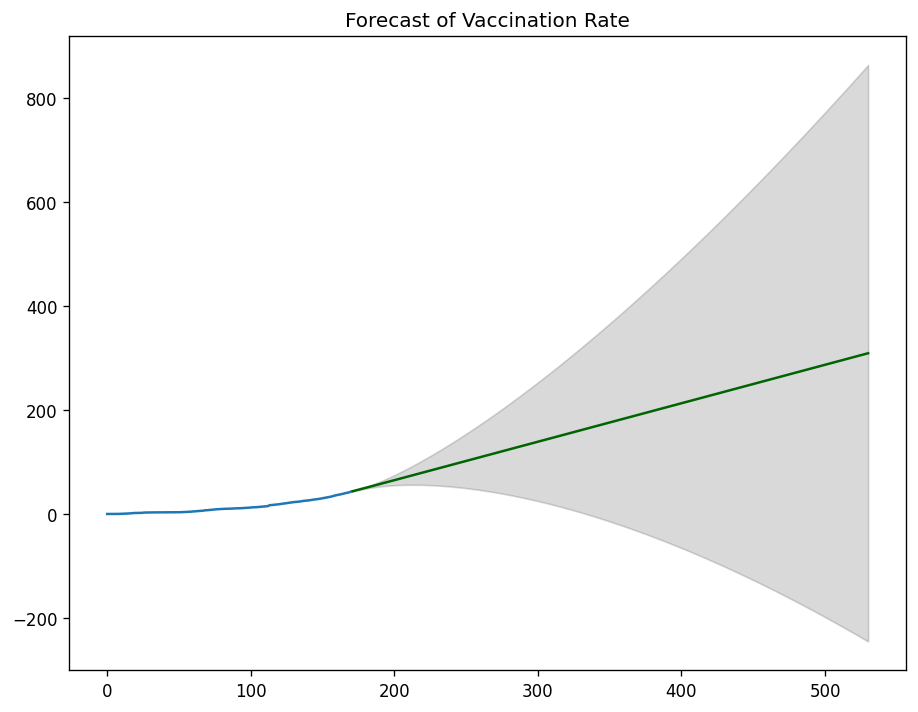

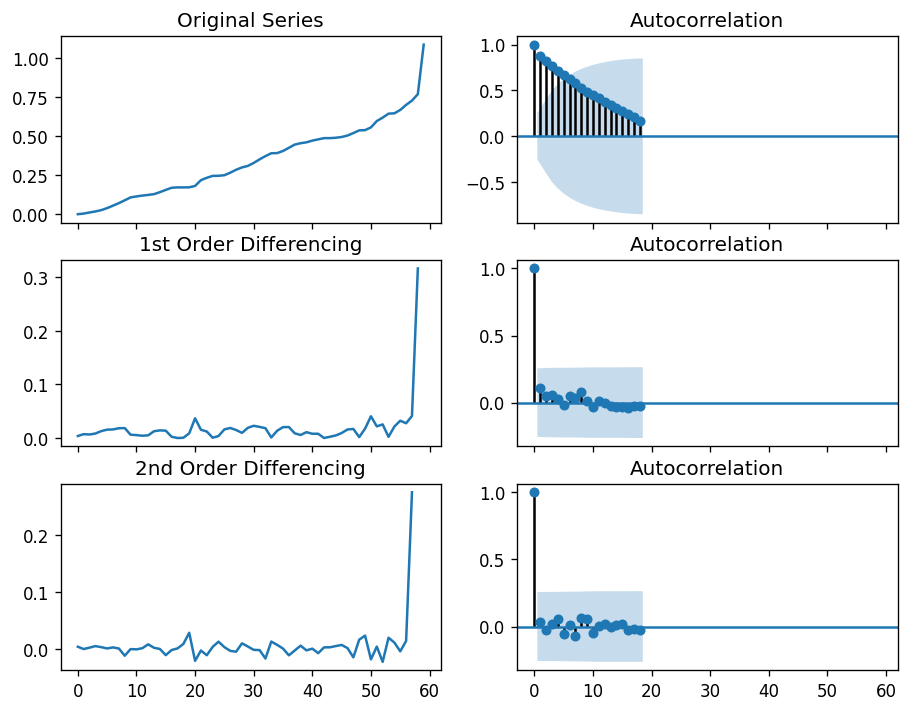

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-210.476, Time=0.29 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-213.555, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-212.198, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-212.462, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-214.341, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.526 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 108.171
Date:                Thu, 10 Jun 2021   AIC                           -214.341
Time:                        22:51:37   BIC                           -212.281
Sample:                             0   HQIC                          -213.539
                                 - 60                                       

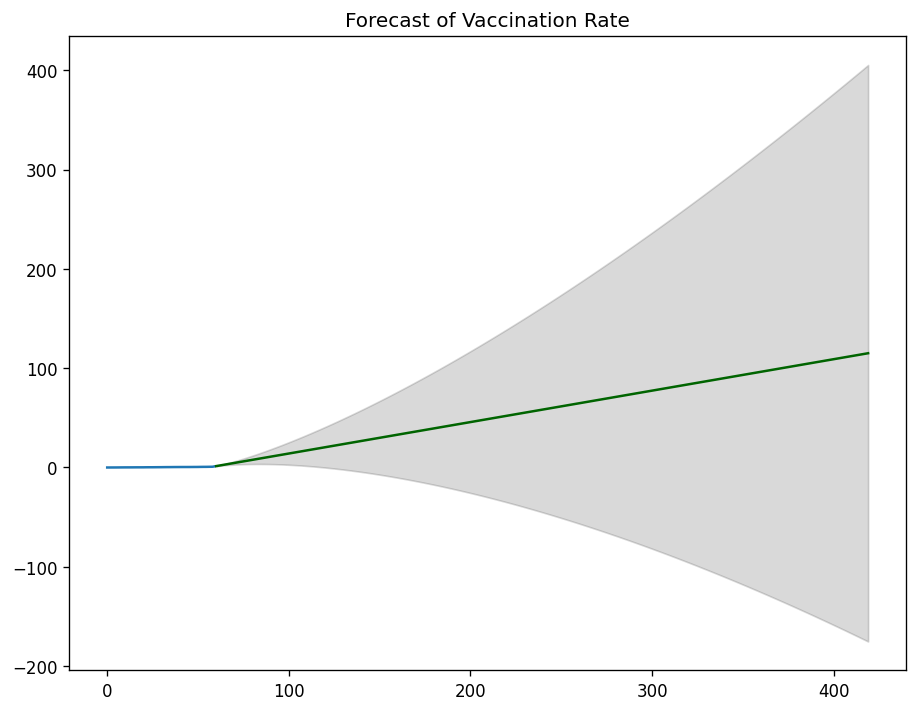

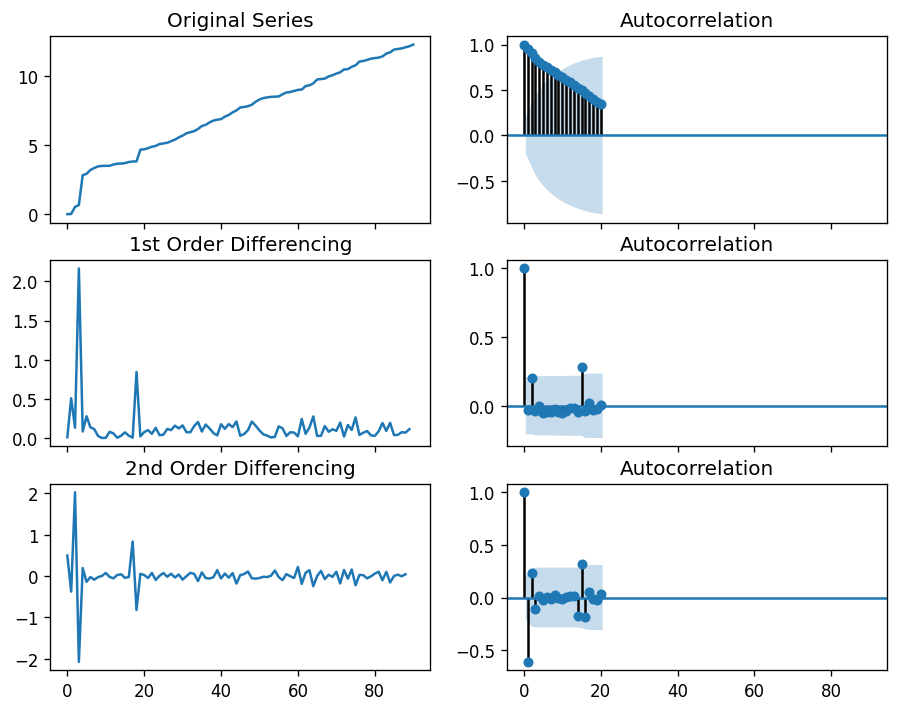

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6.059, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3.837, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5.734, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5.764, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=26.738, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.600 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   91
Model:               SARIMAX(0, 1, 0)   Log Likelihood                   0.082
Date:                Thu, 10 Jun 2021   AIC                              3.837
Time:                        22:51:39   BIC                              8.837
Sample:                             0   HQIC                             5.853
                                 - 91                                         
Covariance 

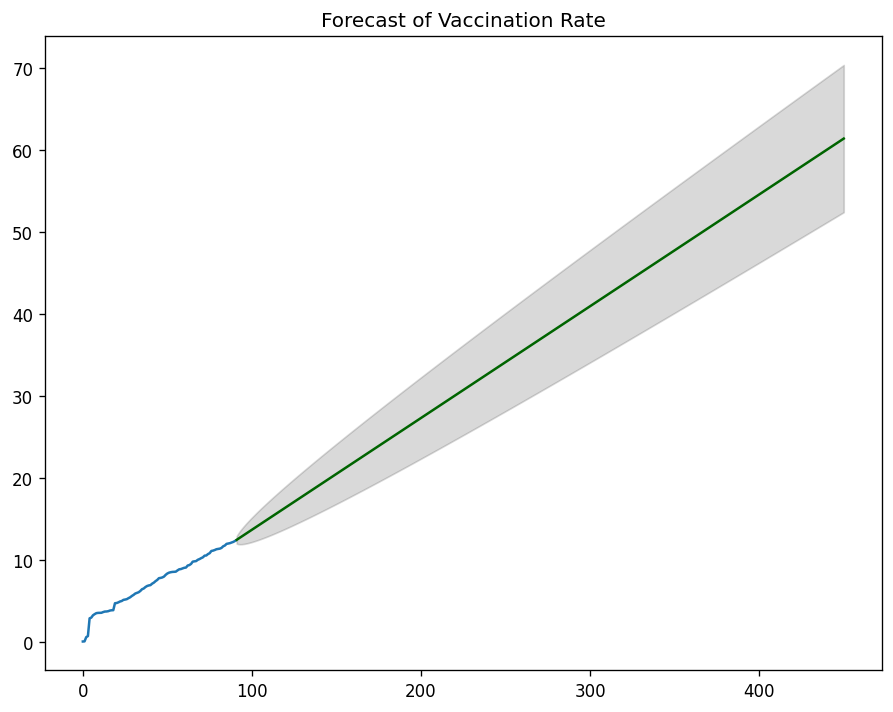

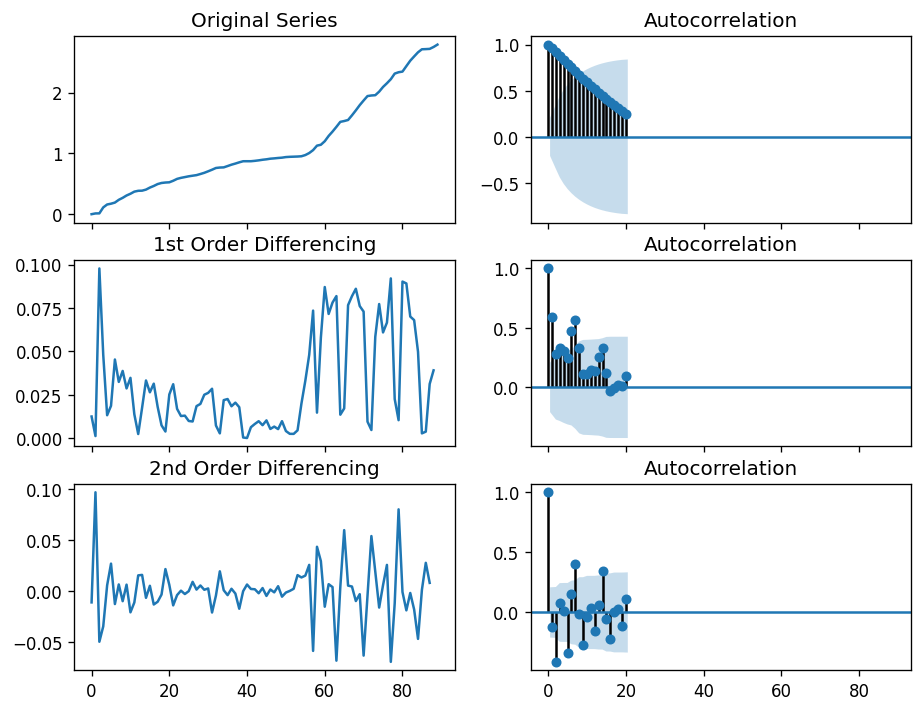

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-408.606, Time=0.31 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-391.834, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-391.112, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-400.501, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-393.822, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-414.877, Time=0.42 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-410.868, Time=0.14 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-410.779, Time=0.51 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-415.162, Time=0.45 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-413.113, Time=0.68 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=-413.322, Time=0.50 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-414.325, Time=0.43 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=-411.838, Time=0.59 sec
 ARIMA(2,2,2)(0,0,0)[0]             : 

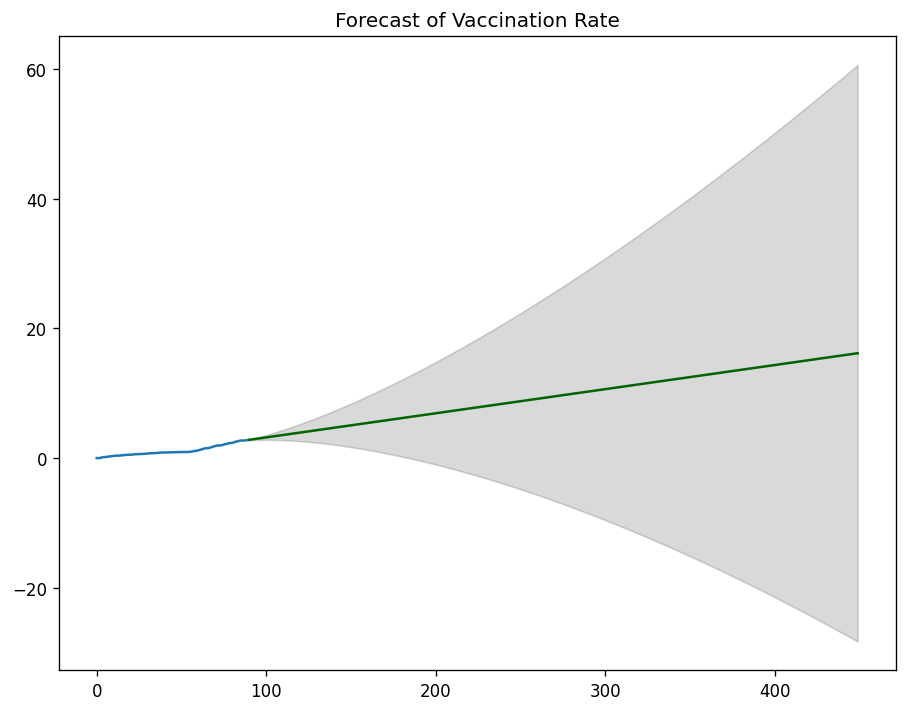

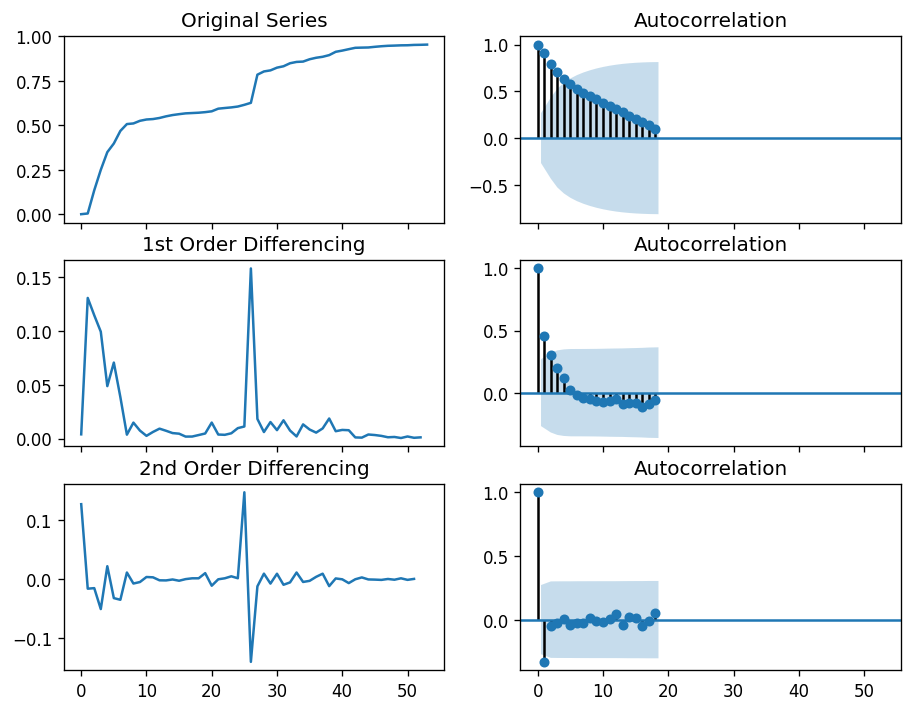

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-214.400, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-205.323, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-215.584, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-212.544, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-193.970, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-214.341, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-212.426, Time=0.36 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-213.351, Time=0.04 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 1.060 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   54
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 110.792
Date:                Thu, 10 Jun 2021   AIC                           -215.584
Time:                        22:51:5

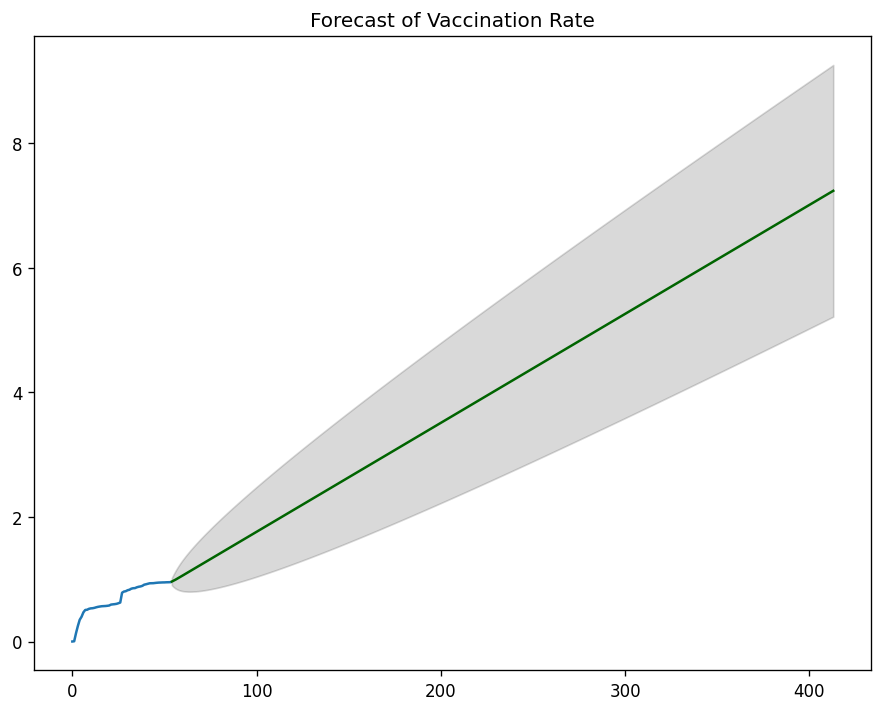

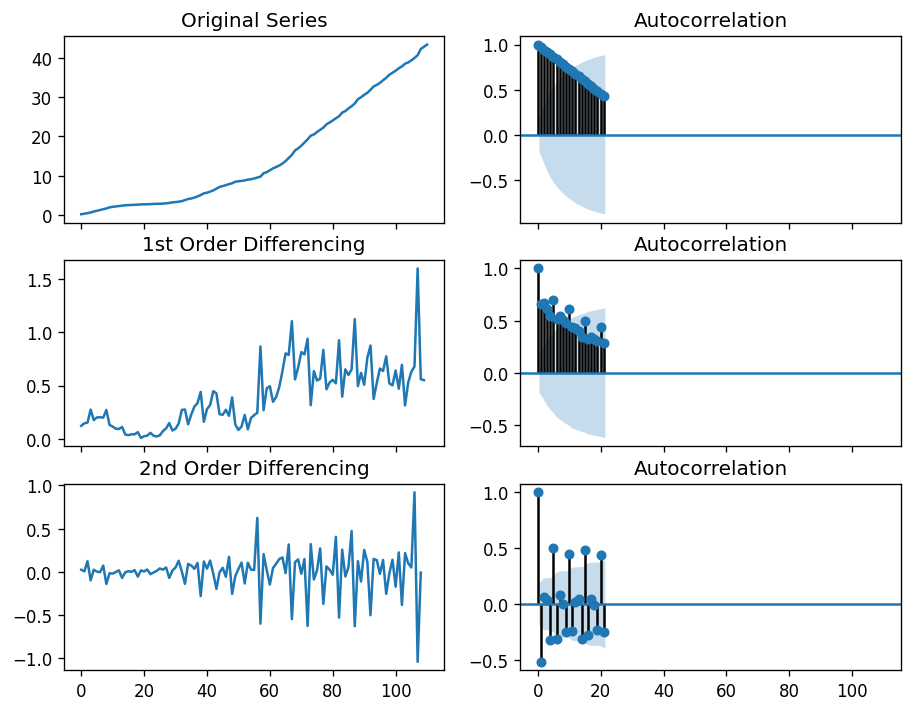

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-46.519, Time=0.23 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=3.216, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-28.067, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-48.296, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1.245, Time=0.01 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-46.521, Time=0.17 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-48.861, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-47.201, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-47.214, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-29.978, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.35 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 1.586 seconds
                               SARIMAX Results                                
Dep. Variable:                   

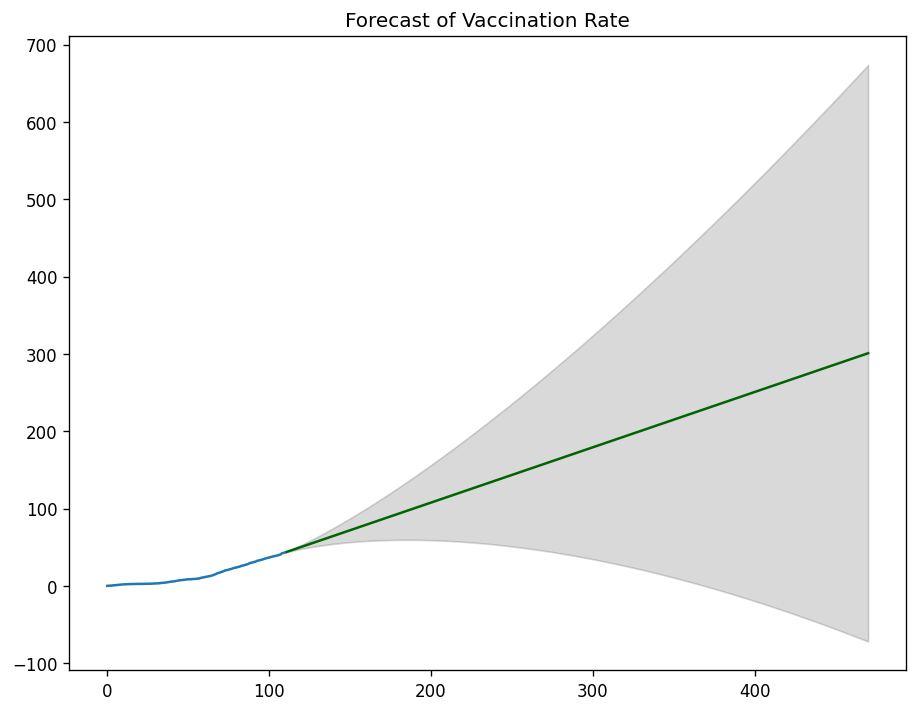

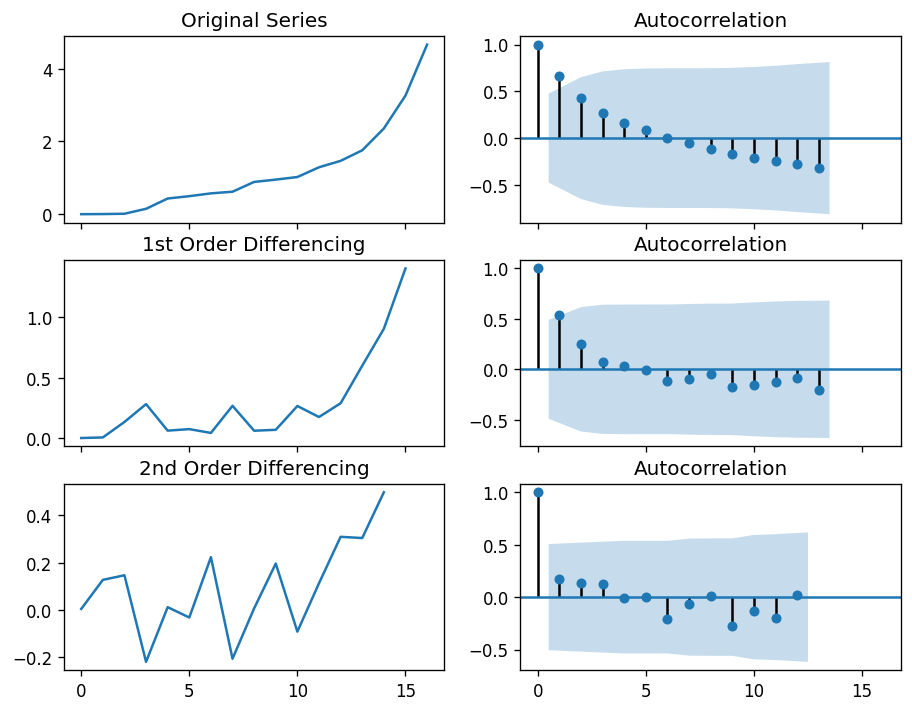

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-0.217, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-3.172, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-1.757, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-1.611, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-1.953, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0] intercept
Total fit time: 0.323 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   17
Model:               SARIMAX(0, 2, 0)   Log Likelihood                   3.586
Date:                Thu, 10 Jun 2021   AIC                             -3.172
Time:                        22:51:56   BIC                             -1.756
Sample:                             0   HQIC                            -3.187
                                 - 17                                         
Covaria

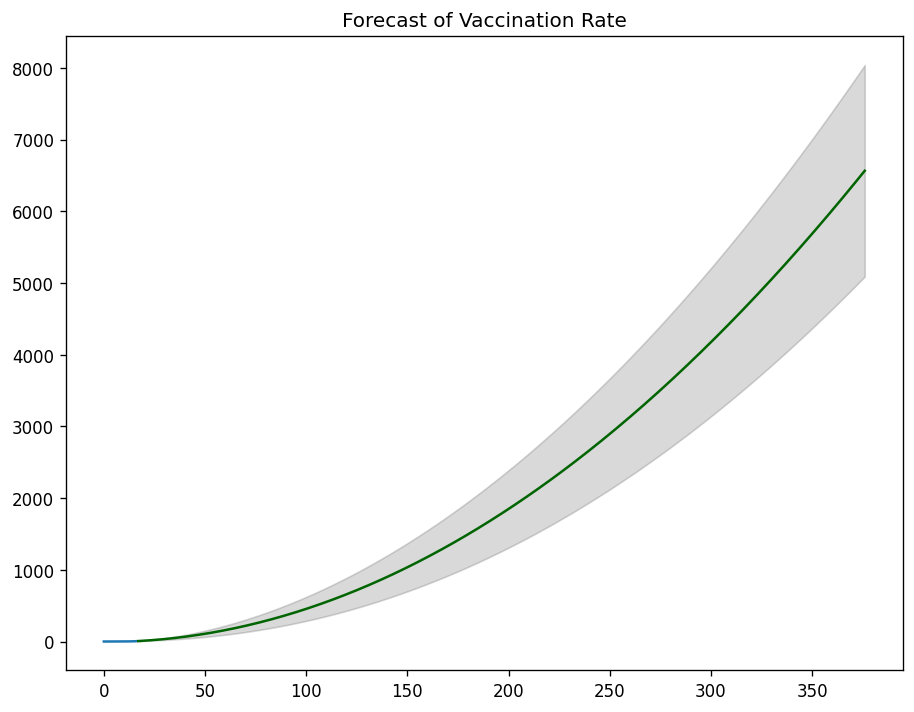

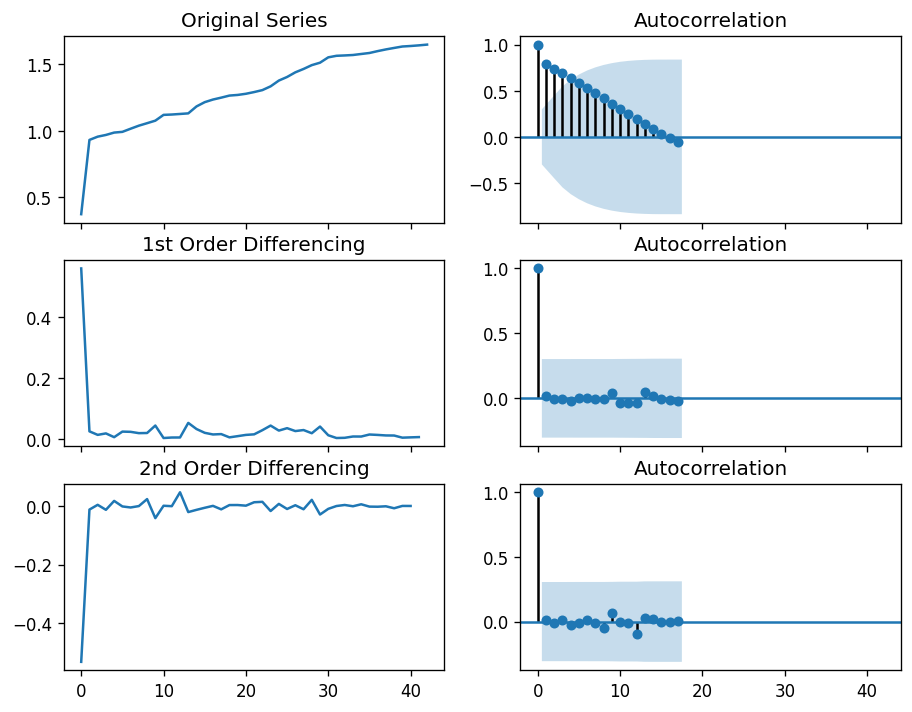

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-85.553, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-83.868, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-84.133, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-82.325, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.796 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   43
Model:               SARIMAX(0, 1, 0)   Log Likelihood                  44.776
Date:                Thu, 10 Jun 2021   AIC                            -85.553
Time:                        22:51:58   BIC                            -82.078
Sample:                             0   HQIC                           -84.279
                                 - 43                                         
Covari

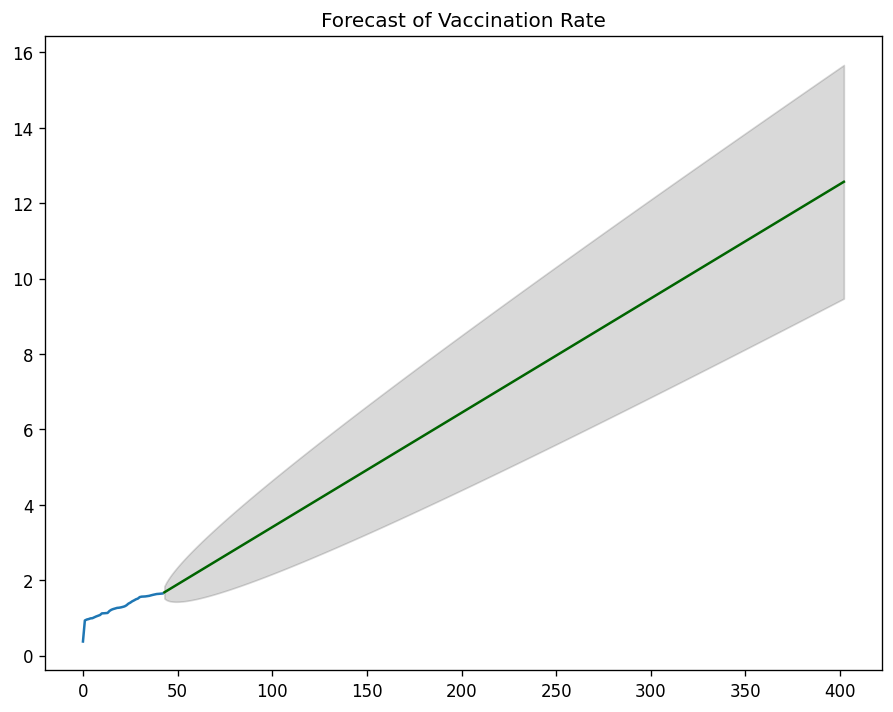

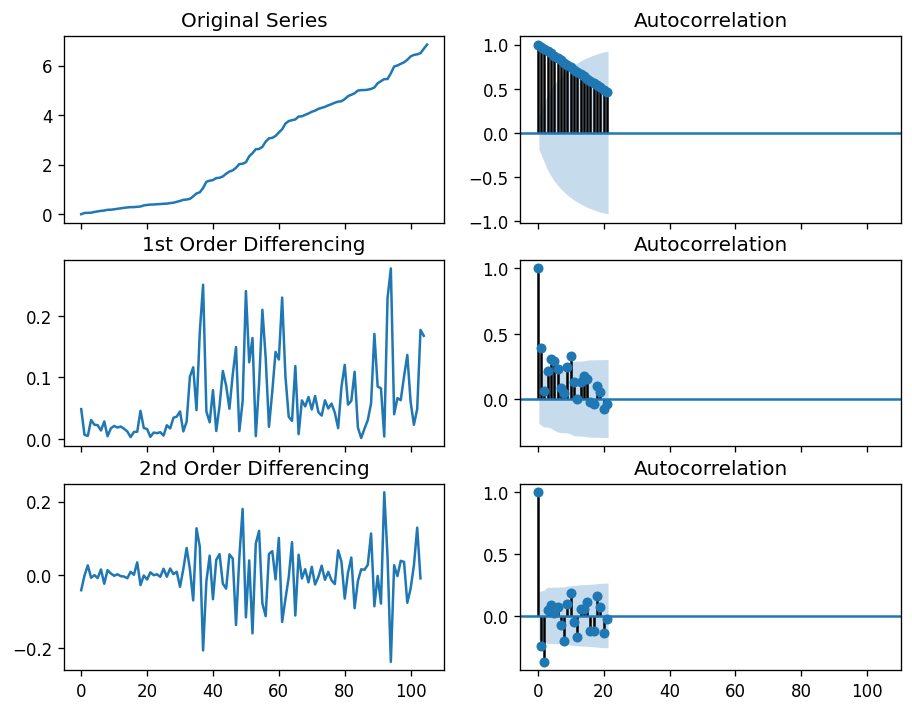

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-294.971, Time=0.35 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-258.387, Time=0.06 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-262.601, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-292.805, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-260.358, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-301.565, Time=0.30 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-285.514, Time=0.09 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-299.760, Time=0.48 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-299.746, Time=0.19 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-298.958, Time=0.30 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-291.475, Time=0.27 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-297.762, Time=0.56 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-302.872, Time=0.18 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-295.599, Time=0.14 sec
 ARIMA(2,2,0)(0,0,0)[0]          

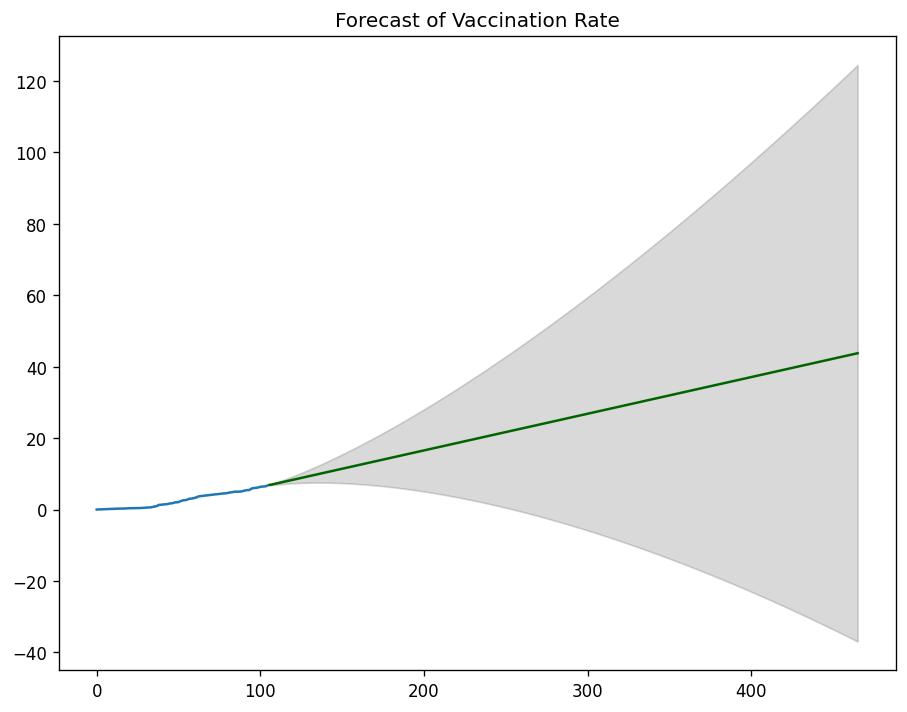

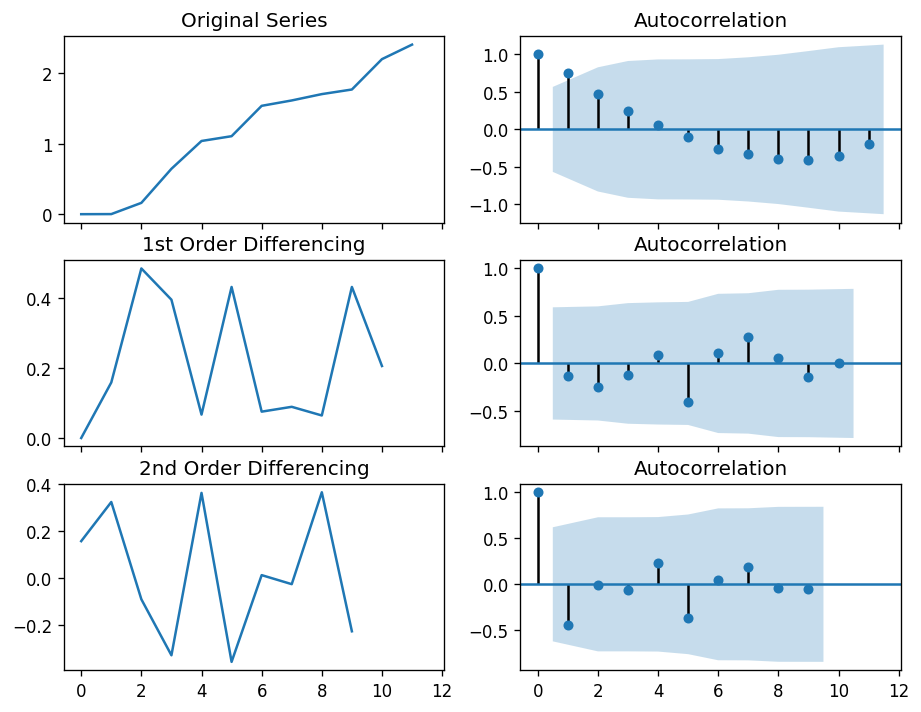

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=5.566, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=5.380, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3.627, Time=0.03 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.414 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:               SARIMAX(0, 2, 0)   Log Likelihood                  -0.814
Date:                Thu, 10 Jun 2021   AIC                              3.627
Time:                        22:52:07   BIC                              3.930
Sample:                             0   HQIC                             3.295
                                 - 12                                         
Covariance Type:

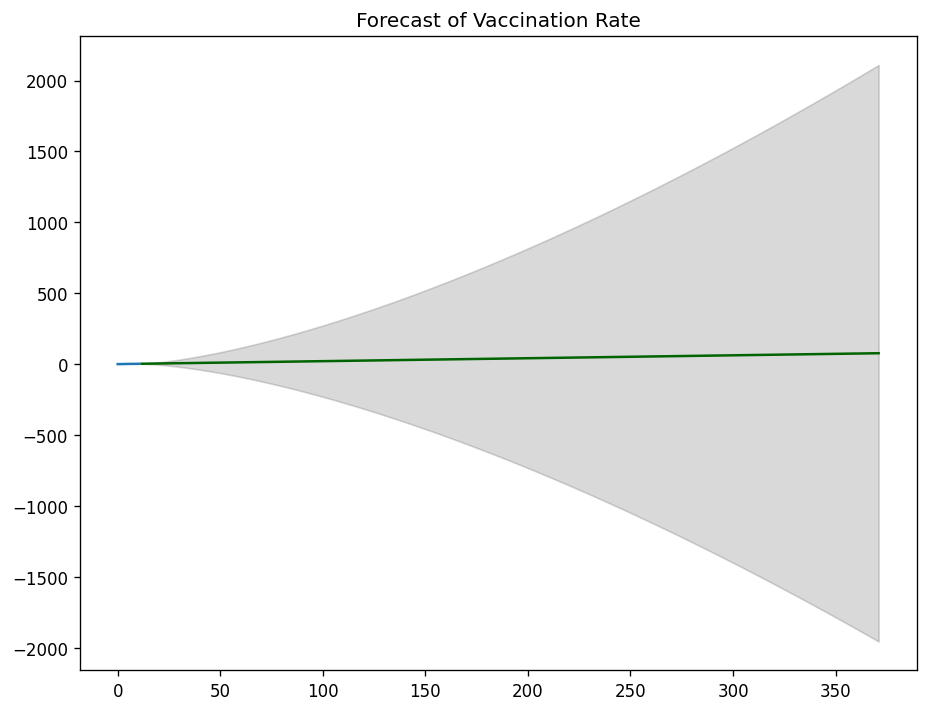

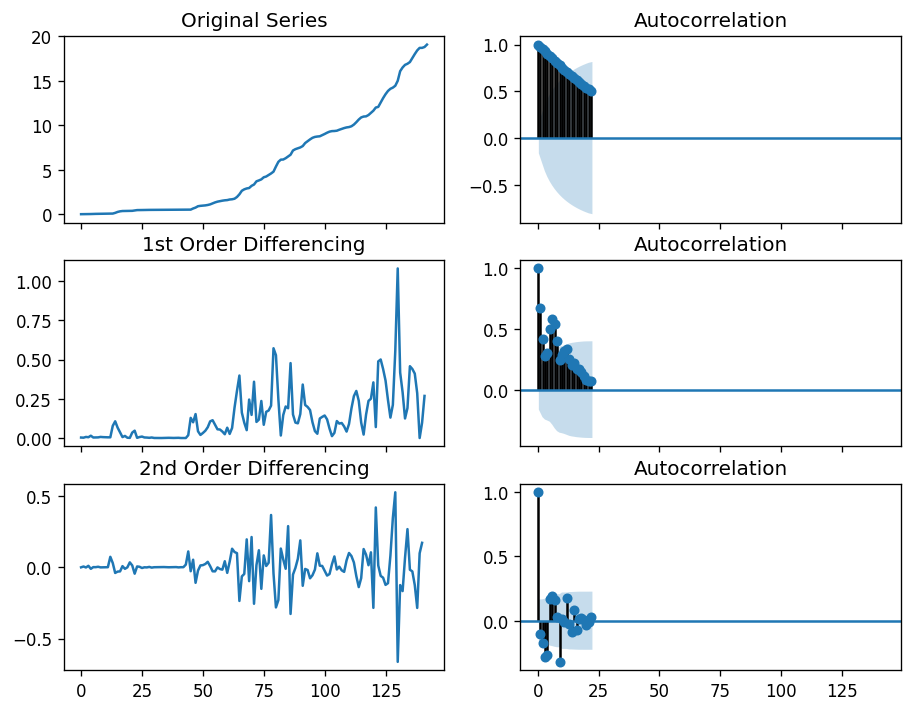

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-170.224, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-169.700, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-176.328, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-172.195, Time=0.02 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-201.870, Time=0.22 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-204.478, Time=0.54 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=-222.951, Time=0.66 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-199.884, Time=0.49 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=-221.084, Time=0.69 sec
 ARIMA(2,2,4)(0,0,0)[0] intercept   : AIC=-216.099, Time=0.75 sec
 ARIMA(1,2,4)(0,0,0)[0] intercept   : AIC=-205.227, Time=0.63 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-220.5

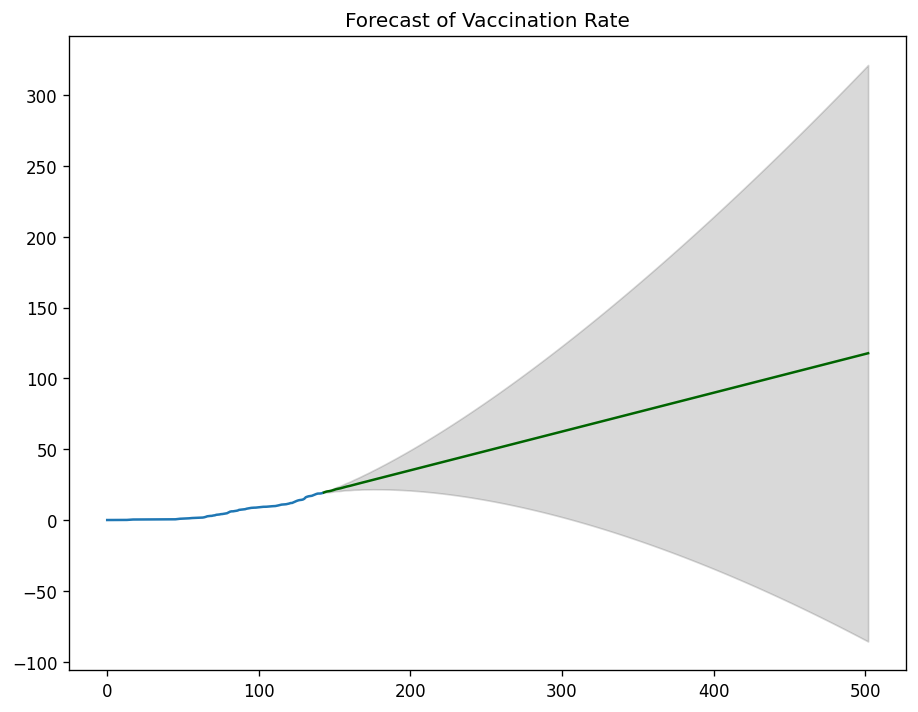

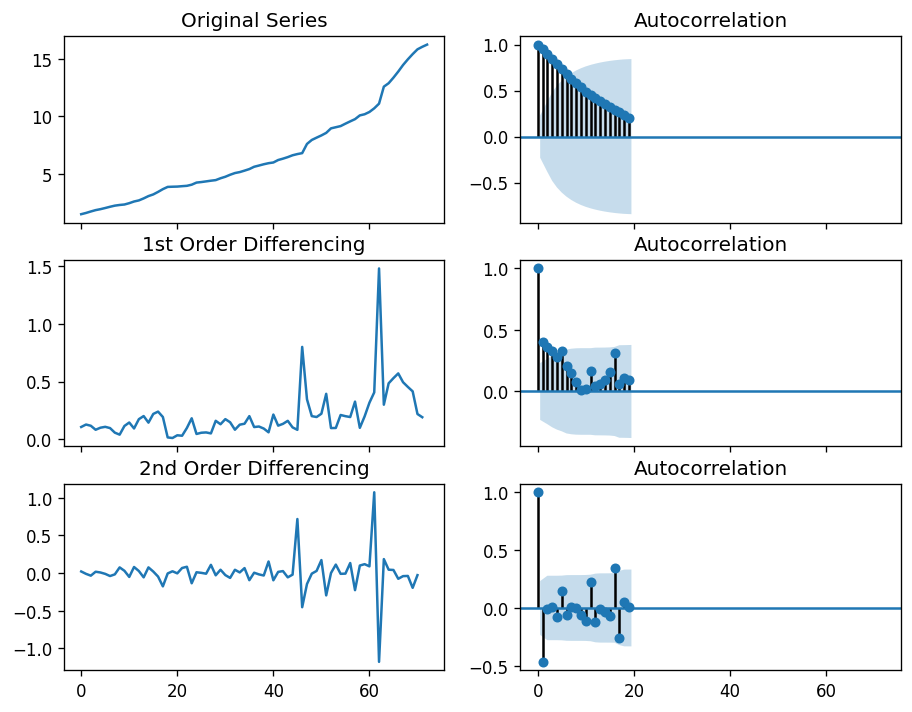

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-2.954, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-18.086, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-31.840, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-4.952, Time=0.03 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-30.997, Time=0.15 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-28.508, Time=0.18 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-32.546, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-31.016, Time=0.08 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-30.953, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-20.081, Time=0.05 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-28.941, Time=0.14 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 1.406 seconds
                               SARIMAX Results                                
Dep. Variable:             

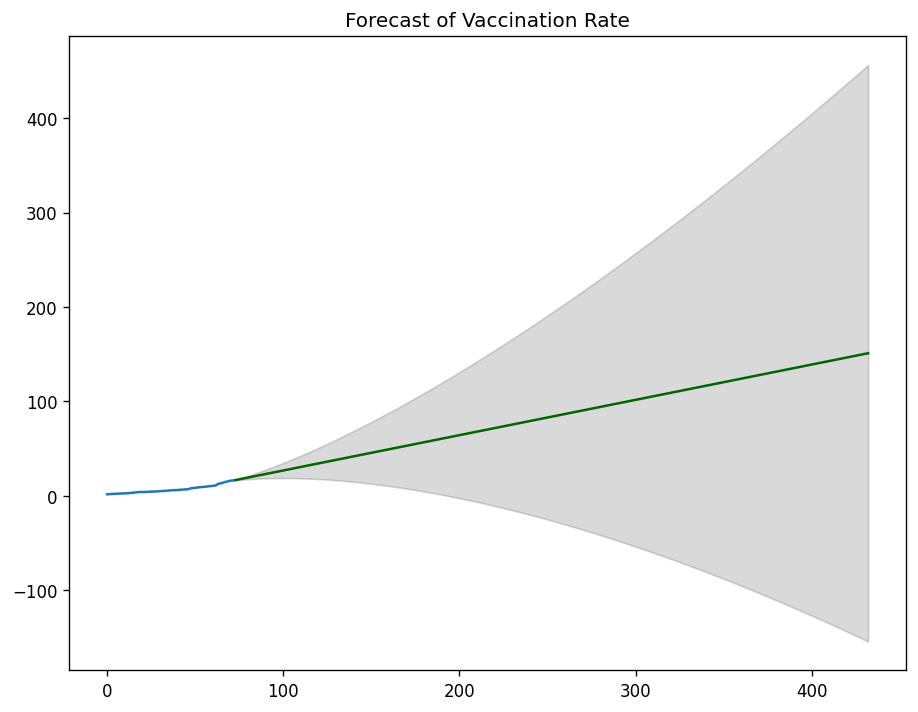

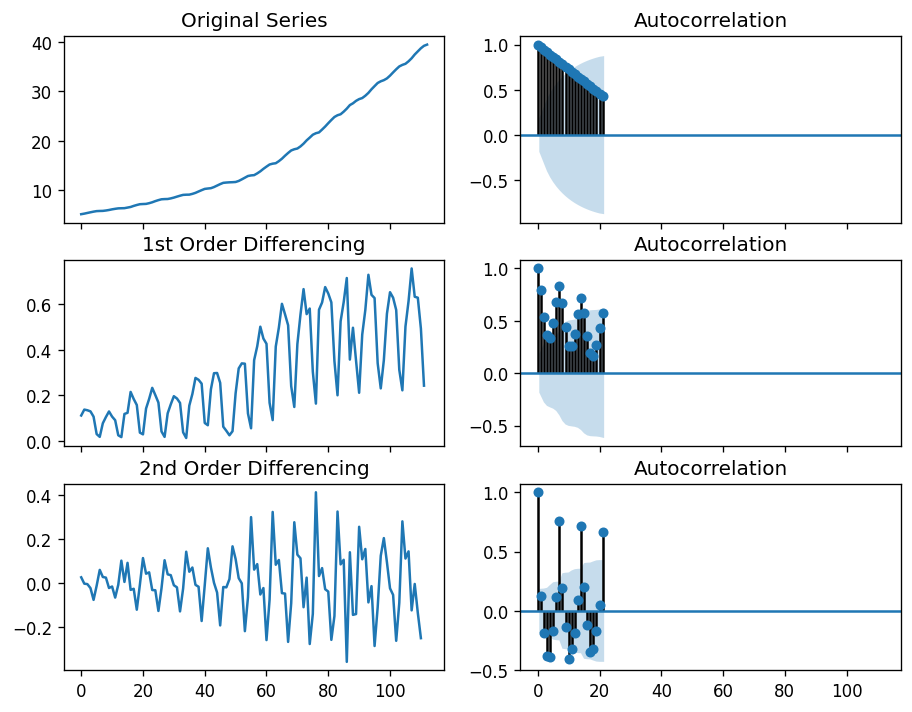

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-138.108, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-23.594, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-133.213, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-106.090, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=99.046, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-136.715, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-144.117, Time=0.38 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-133.291, Time=0.16 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-136.059, Time=0.39 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-150.867, Time=0.50 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-147.018, Time=0.61 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-149.985, Time=0.55 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-152

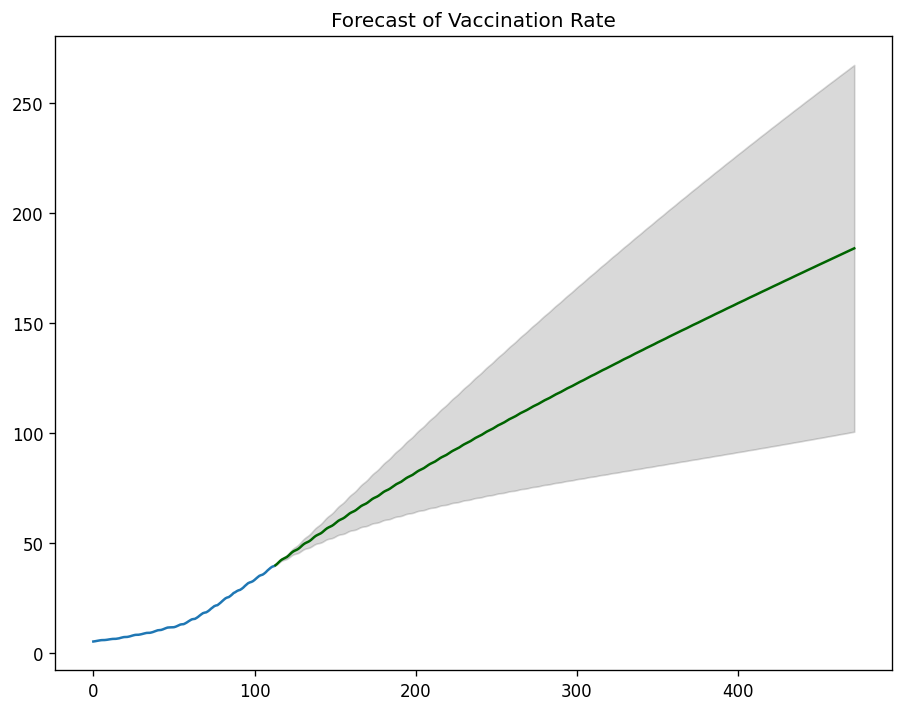

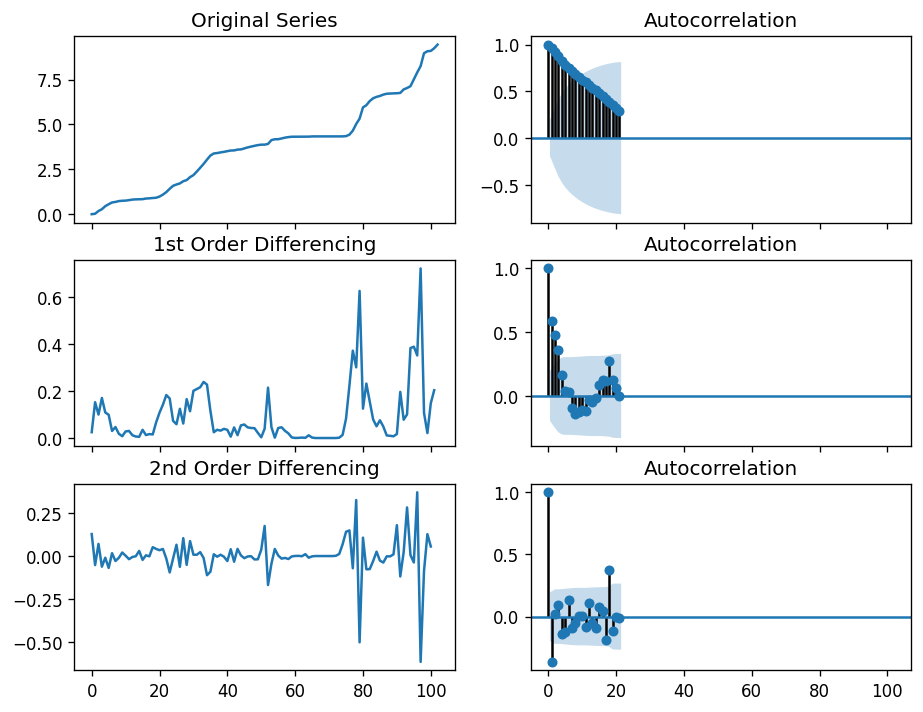

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-175.743, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-133.015, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-174.133, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-158.040, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-89.555, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-174.459, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-175.777, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-164.909, Time=0.14 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-174.773, Time=0.44 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-176.893, Time=0.32 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-178.308, Time=0.15 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-177.177, Time=0.36 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-175.026, Time=0.57 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-164.899, Time=0.15 sec

Best model:  ARIMA(0,1,3)(0,0,0)[

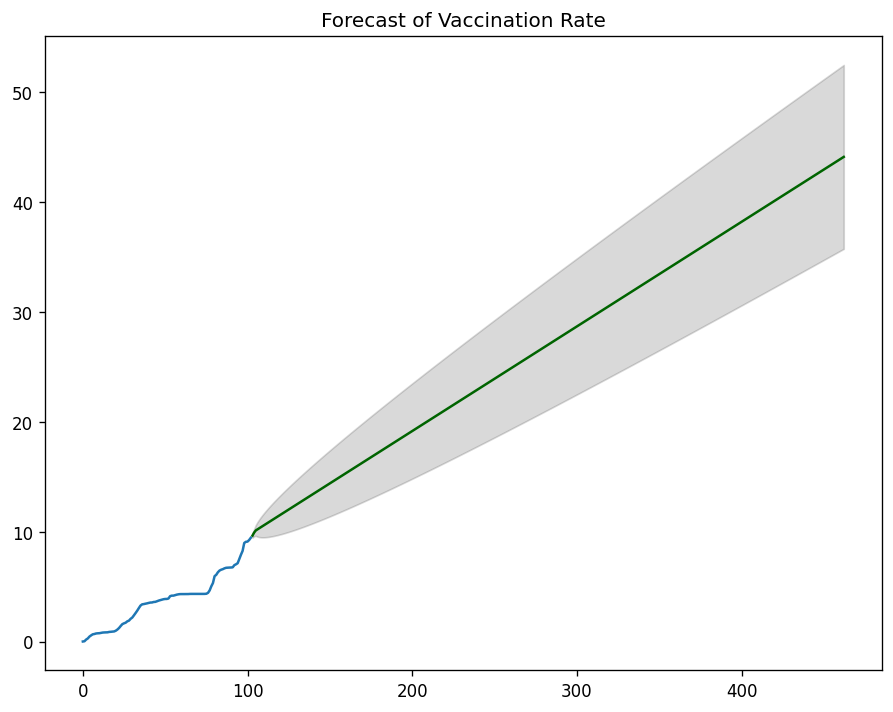

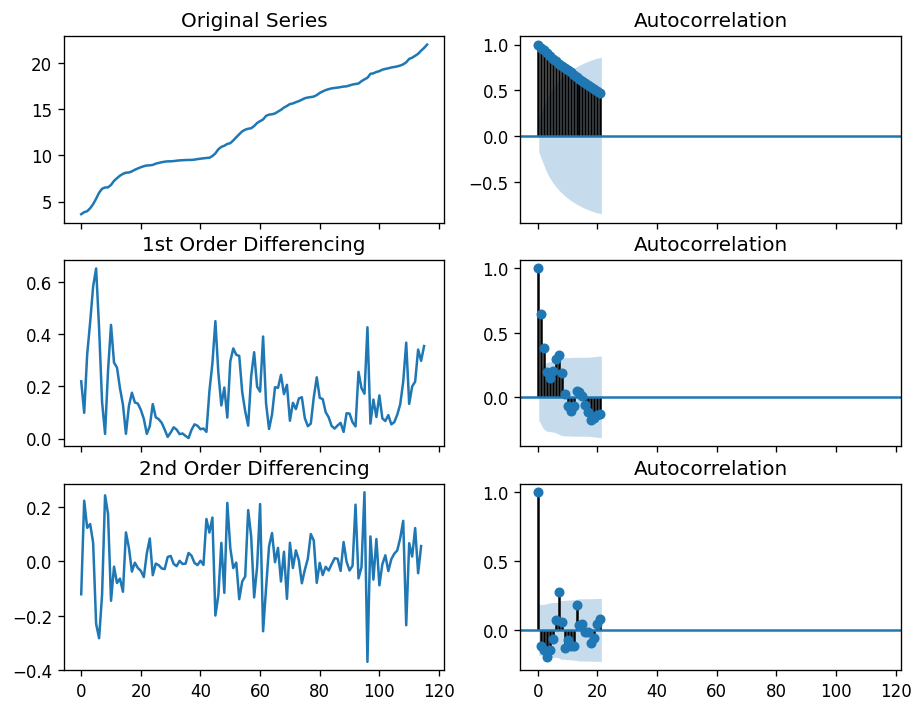

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-185.054, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-184.501, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-185.379, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-187.040, Time=0.05 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.795 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  117
Model:               SARIMAX(0, 2, 0)   Log Likelihood                  94.520
Date:                Thu, 10 Jun 2021   AIC                           -187.040
Time:                        22:52:45   BIC                           -184.295
Sample:                             0   HQIC                          -185.926
                                - 117                                         
Co

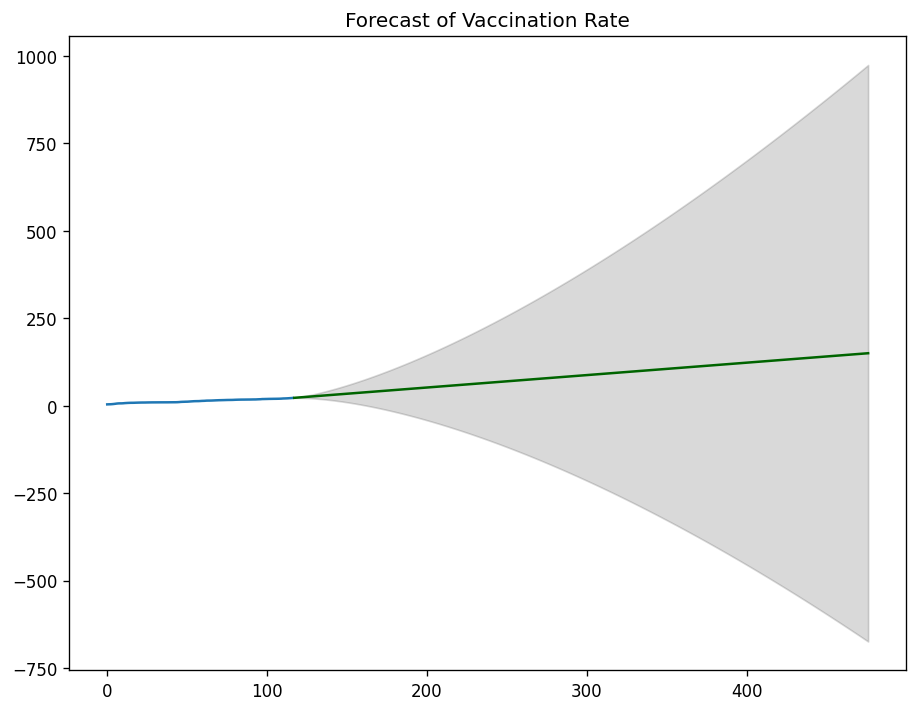

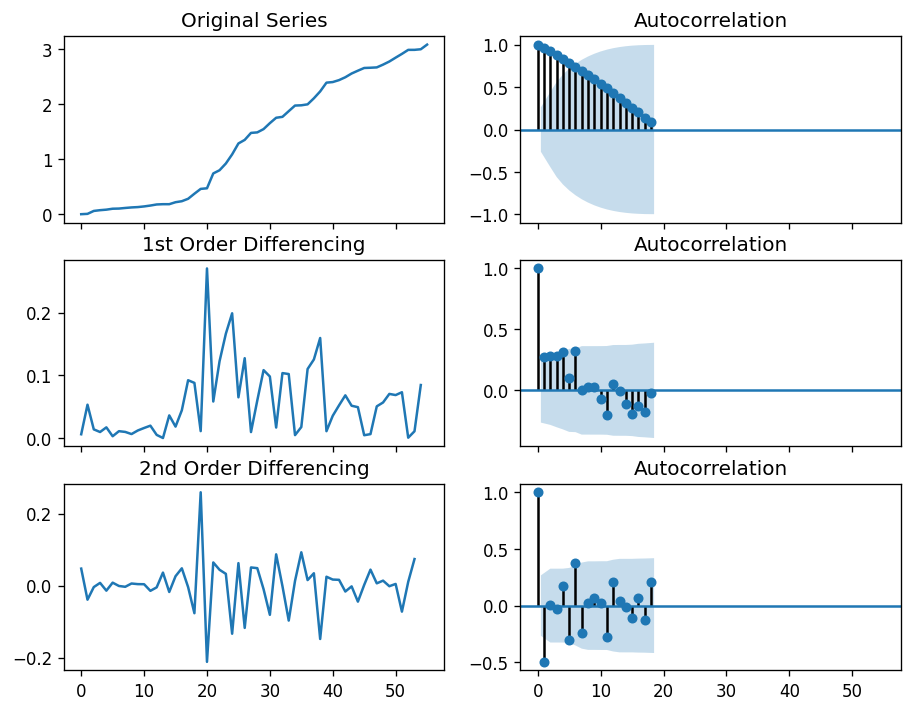

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-155.812, Time=0.27 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-133.687, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-147.229, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-157.564, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-135.662, Time=0.03 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-155.864, Time=0.20 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-153.732, Time=0.18 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-159.465, Time=0.10 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-157.737, Time=0.11 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-157.797, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-149.211, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-156.967, Time=0.25 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 1.501 seconds
                               SARIMAX Results                                
Dep. Vari

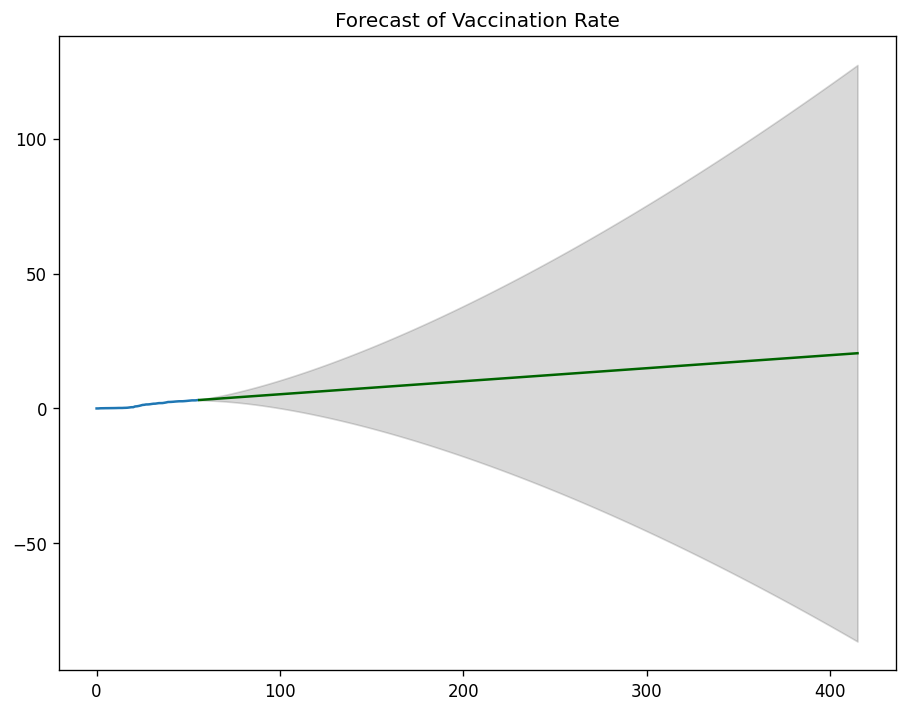

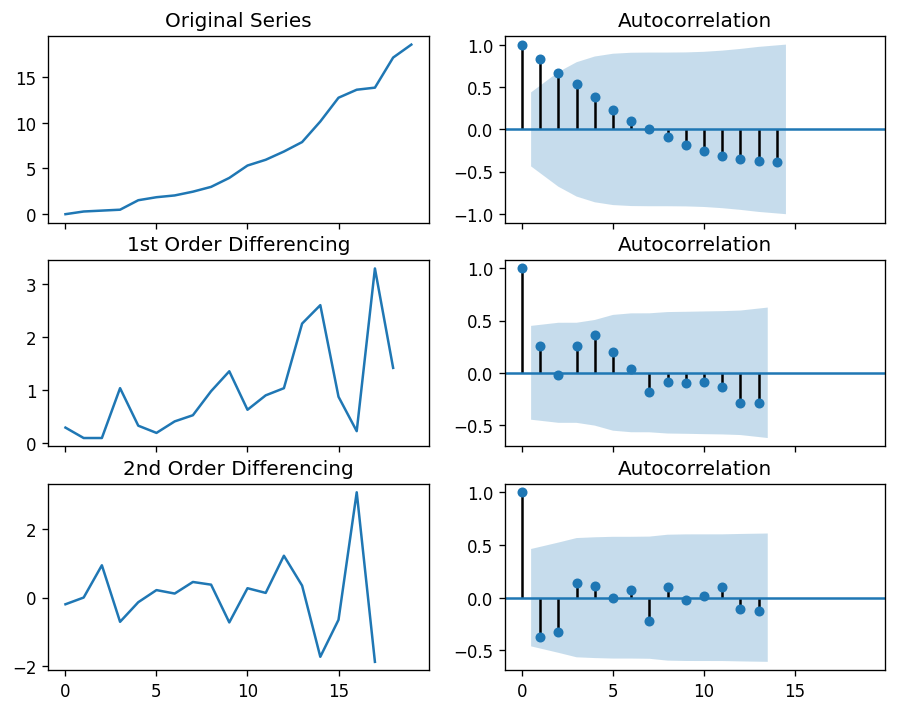

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=57.215, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=55.962, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=55.277, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.420 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   20
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 -26.639
Date:                Thu, 10 Jun 2021   AIC                             55.277
Time:                        22:52:50   BIC                             56.168
Sample:                             0   HQIC                            55.400
                                 - 20                                         
Covariance Ty

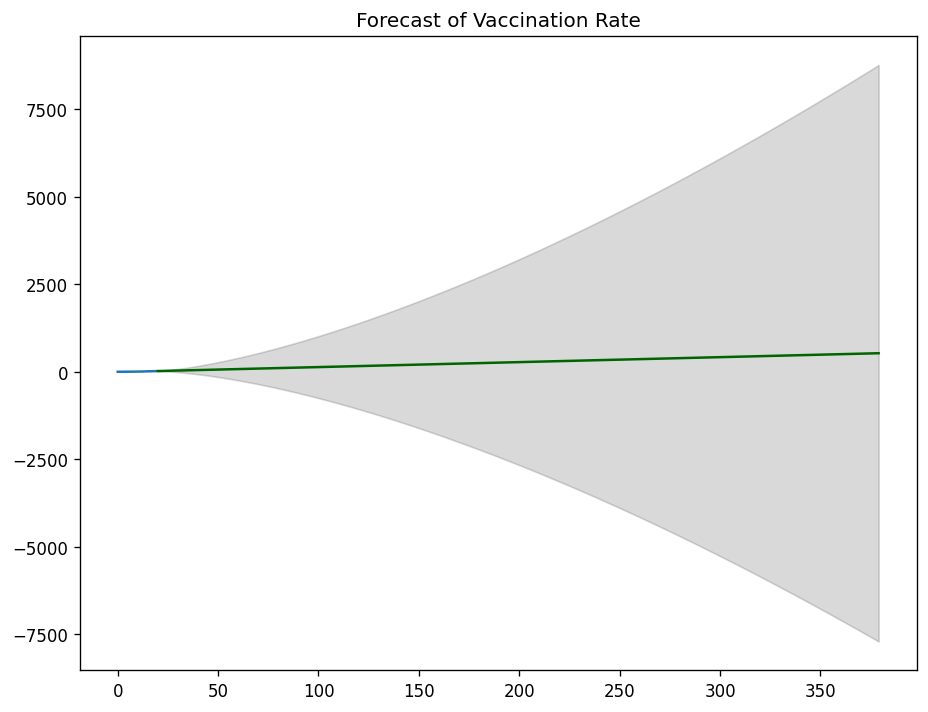

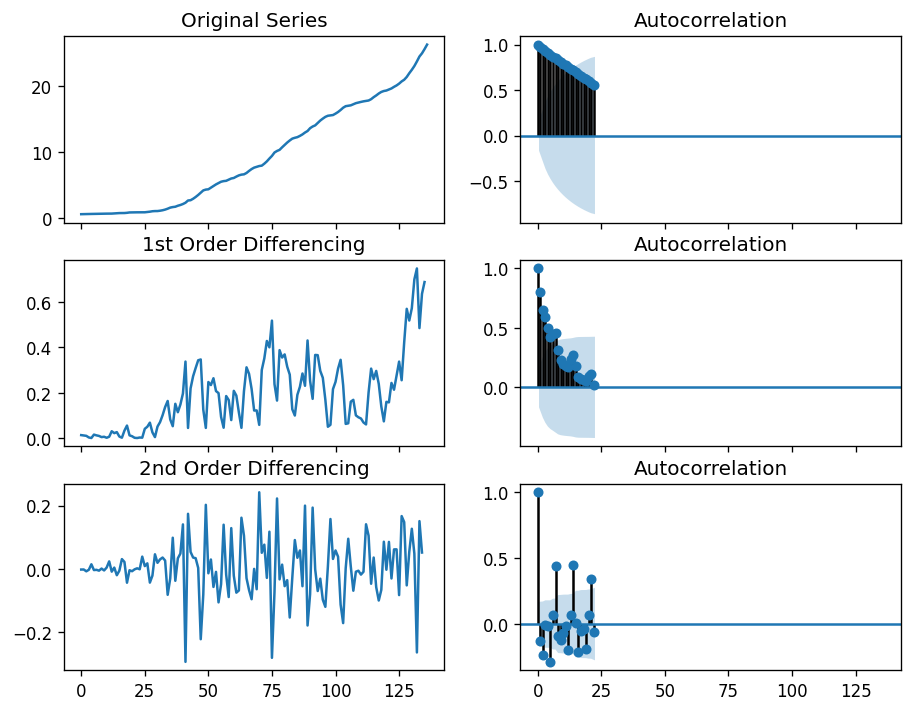

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-267.698, Time=0.52 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-257.319, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-257.430, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-259.664, Time=0.23 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-258.920, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-268.203, Time=0.31 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-264.402, Time=0.11 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-266.308, Time=0.48 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-263.805, Time=0.51 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-268.451, Time=0.49 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-269.868, Time=0.15 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-268.506, Time=0.57 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-267.229, Time=0.56 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-270.091, Time=0.18 sec
 ARIMA(0,2,1)(0,0,0)[0]          

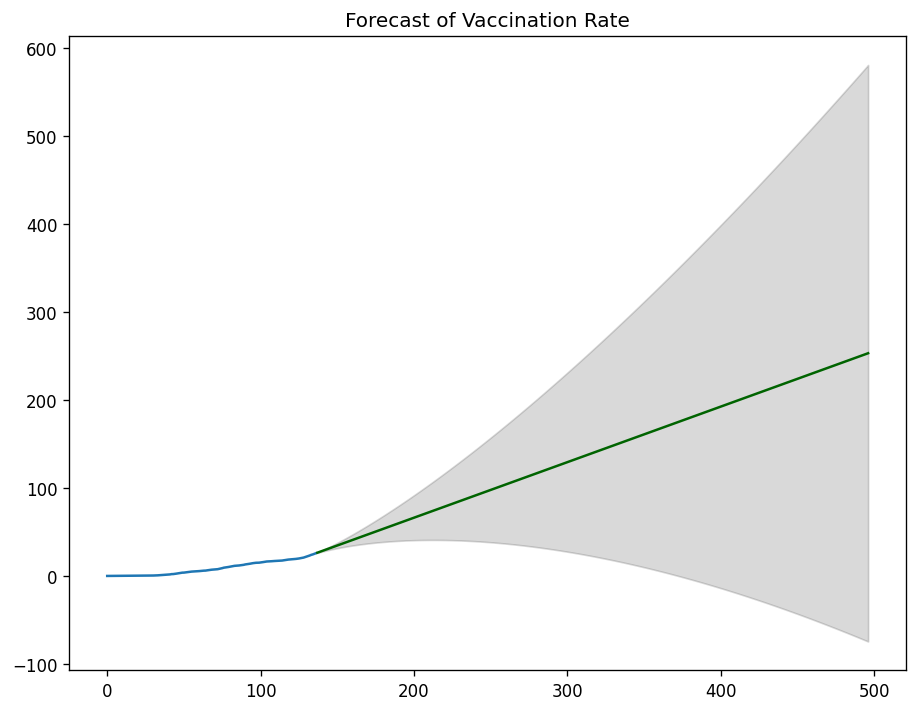

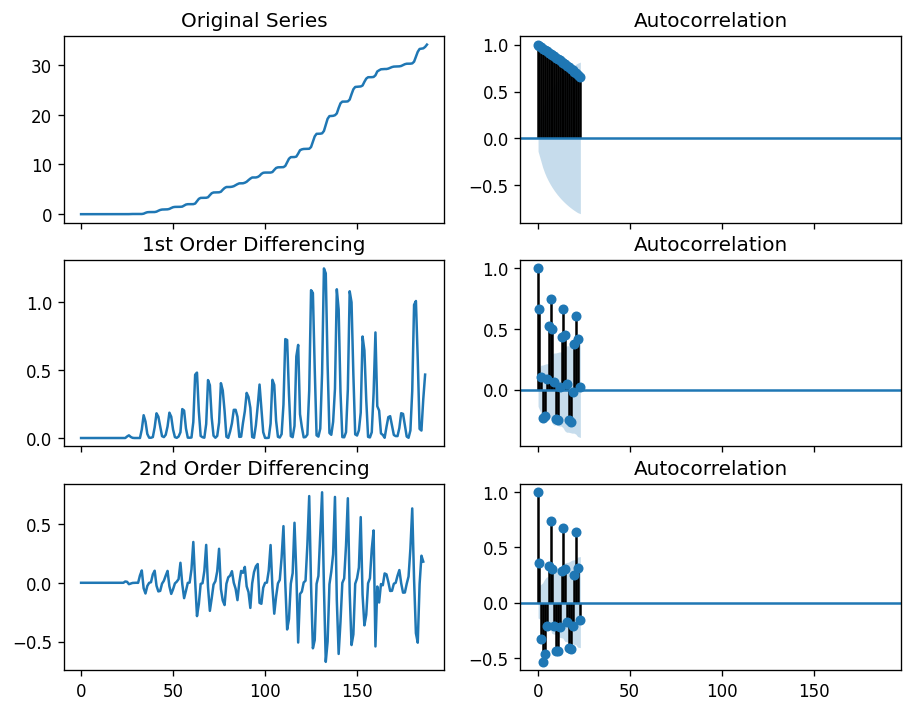

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-78.251, Time=0.25 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-25.888, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-49.639, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-79.905, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-27.865, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-116.405, Time=0.26 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-116.717, Time=0.15 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-81.889, Time=0.16 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-133.998, Time=0.54 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-80.234, Time=0.07 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-203.496, Time=0.42 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-183.023, Tim

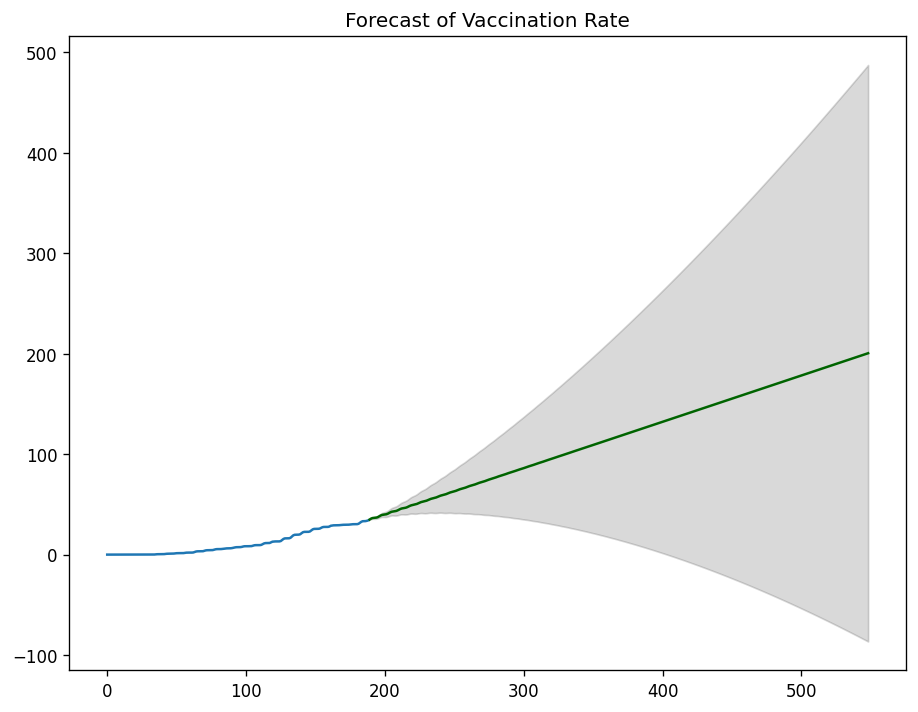

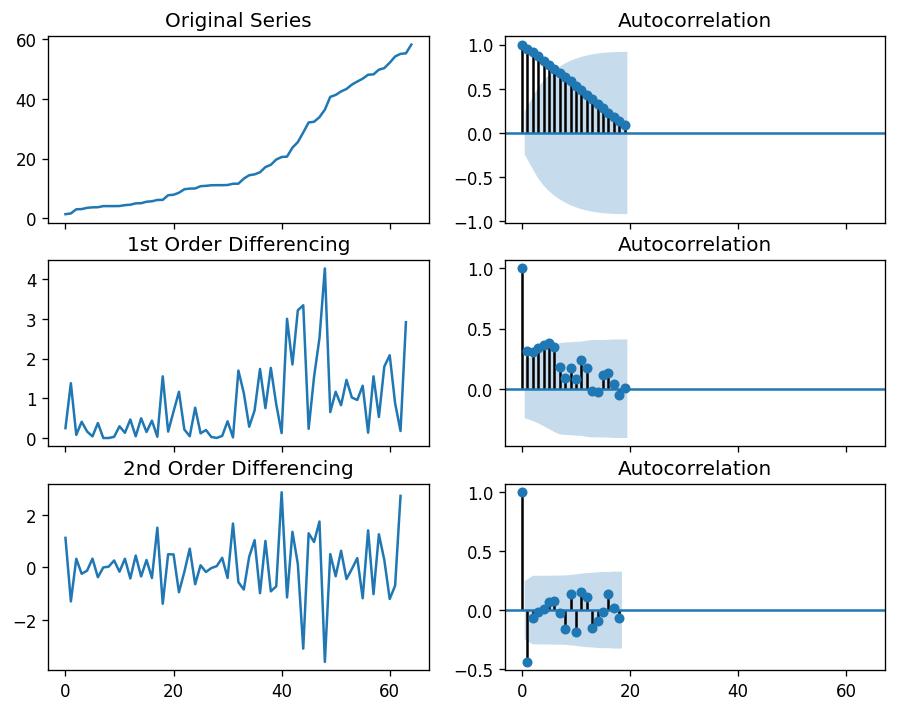

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=167.116, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=194.877, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=181.695, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=165.190, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=192.970, Time=0.01 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=168.006, Time=0.19 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=163.889, Time=0.06 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=165.689, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=165.581, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=179.768, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.28 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 1.344 seconds
                               SARIMAX Results                                
Dep. Variable:               

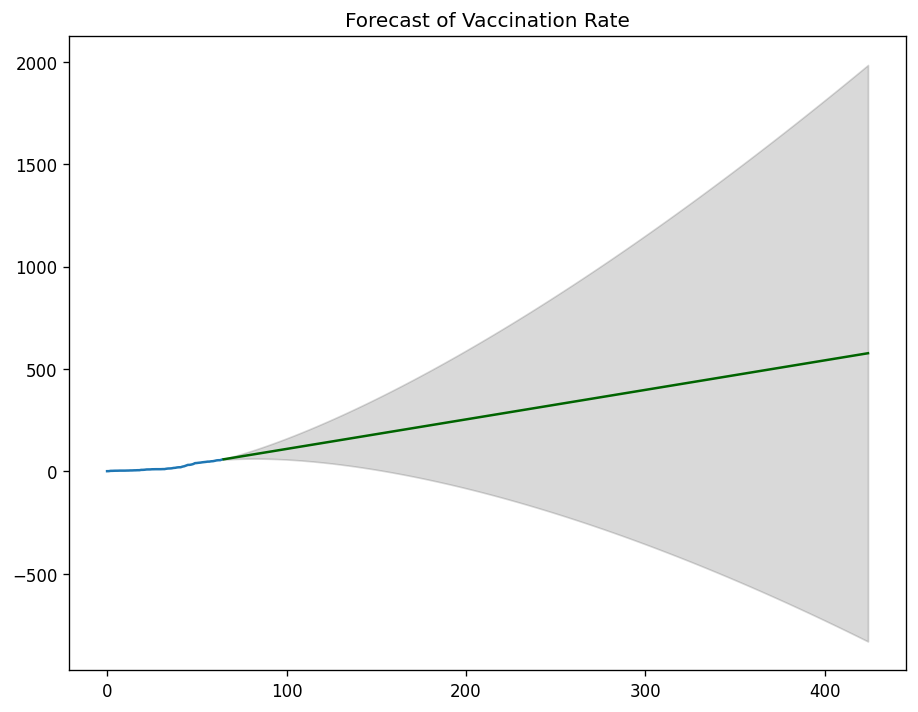

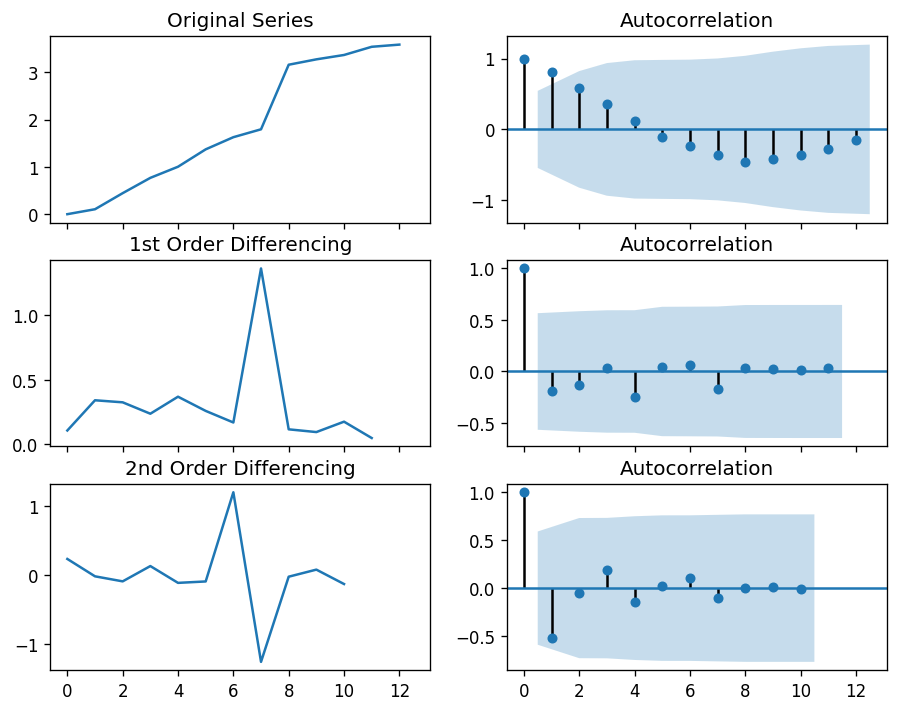

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=21.369, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=20.165, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=19.370, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.416 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   13
Model:               SARIMAX(0, 2, 0)   Log Likelihood                  -8.685
Date:                Thu, 10 Jun 2021   AIC                             19.370
Time:                        22:53:21   BIC                             19.768
Sample:                             0   HQIC                            19.119
                                 - 13                                         
Covariance Ty

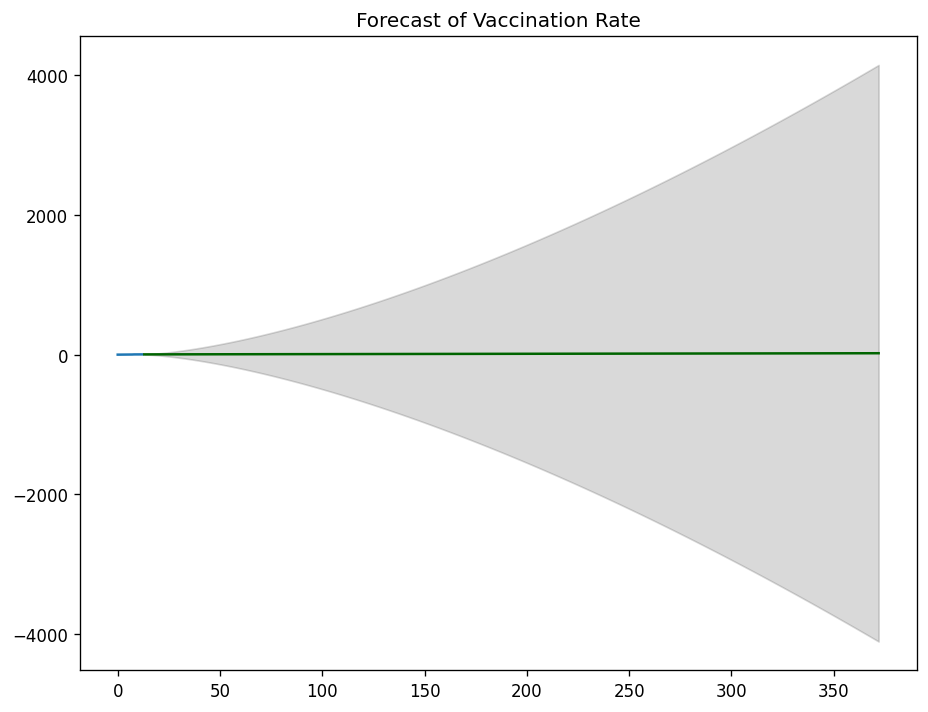

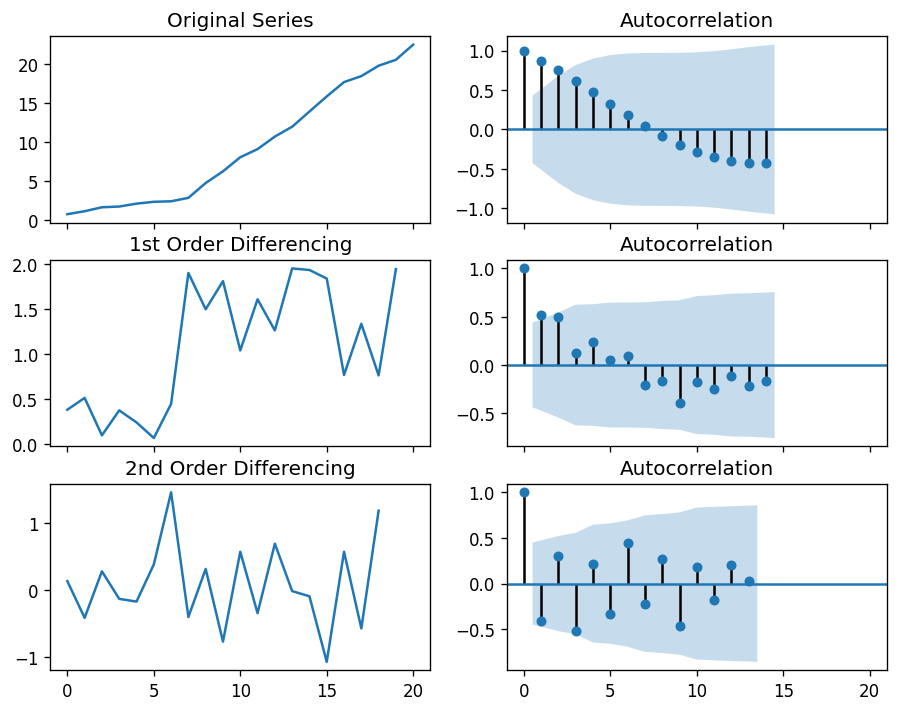

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=35.396, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=40.139, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=38.000, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=38.301, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=38.465, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=37.374, Time=0.18 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=37.355, Time=0.17 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=39.274, Time=0.05 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=33.742, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=37.207, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=36.489, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=35.704, Time=0.16 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=35.677, Time=0.14 sec
 AR

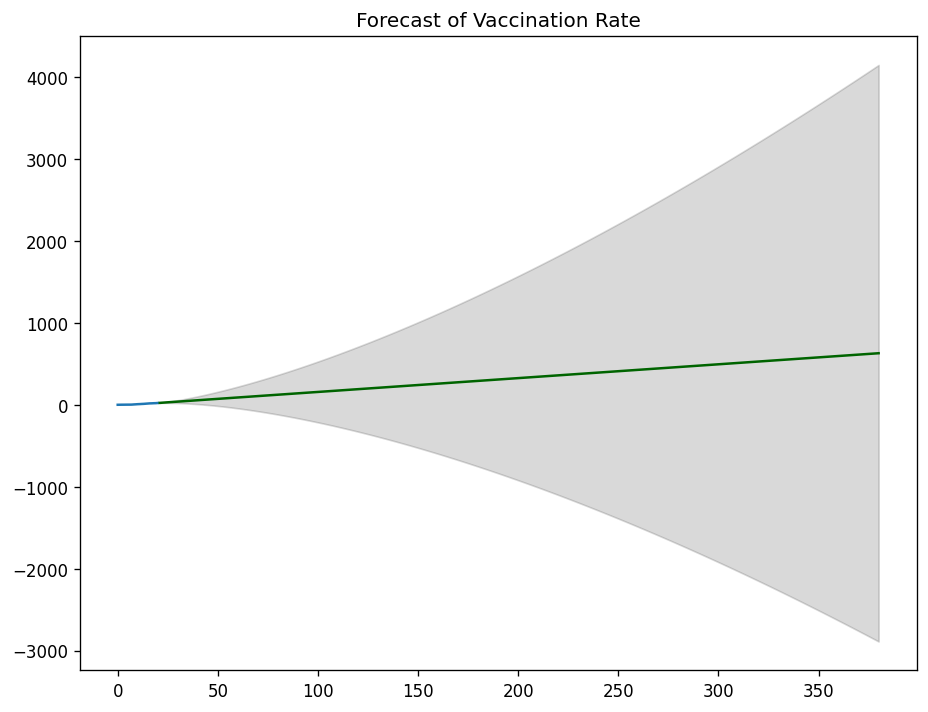

In [14]:
import math
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
country_list = ['CAN', 'AUS', 'GBR', 'USA', 'BRA', 'DEU', 'DNK', 'ZAF', 'RUS', 'GTM',
                'NGA', 'ESP', 'IRN', 'ETH', 'IDN', 'EGY', 'MEX', 'COL', 'CHE', 'LKA', 'TUR', 'NAM',
                'JOR', 'ARG', 'NOR', 'ISL', 'UZB', 'PYF']


#create one big dataframe within the for loop
big_data= pd.DataFrame()       
                       
for country in country_list:
  pcv = pcv.sort_values('location')
  pcv['eid'] = (pcv.groupby(['location']).cumcount()==0).astype(int)
  pcv['eid'] = pcv['eid'].cumsum()
  pcvdf=pcv[pcv.iso_code==country]

  #check dataframe of country
  #Train & Test data

  fpcvdf = pcvdf.sort_values('people_vaccinated')
  pcvval = fpcvdf['people_vaccinated'].values * 100 /list(pcvdf.population)[0]

  for i in range(len(pcvval)):
    if pcvval[i]>=0:
      pass
    else :
      end = i
      break

  pcvval = pcvval[:end]
  d = list(fpcvdf.date)[:end]
  fig, axes = plt.subplots(3, 2, sharex=True)
  axes[0, 0].plot(pcvval); axes[0, 0].set_title('Original Series')
  plot_acf(pcvval, ax=axes[0, 1])

  # 1st Differencing
  axes[1, 0].plot(np.diff(pcvval)); axes[1, 0].set_title('1st Order Differencing')
  plot_acf(np.diff(pcvval), ax=axes[1, 1])
  dpcvval = np.diff(pcvval)

  # 2nd Differencing
  axes[2, 0].plot(np.diff(dpcvval)); axes[2, 0].set_title('2nd Order Differencing')
  plot_acf(np.diff(dpcvval), ax=axes[2, 1])
  plt.show()

  #arima model parameters
  model = pm.auto_arima(pcvval, start_p=1, start_q=1,
  test='adf', # use adftest to find optimal 'd'
  max_p=8, max_q=8, # maximum p and q
  m=1, # frequency of series
  d=None, # let model determine 'd'
  seasonal=False, # No Seasonality
  start_P=0,
  D=0,
  trace=True,
  error_action='ignore',
  suppress_warnings=True,
  stepwise=True)
  print(model.summary())
  # model.plot_diagnostics(figsize=(7,5))
  plt.show()
  n_periods = 12*30
  fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
  index_of_fc = np.arange(len(pcvval), len(pcvval)+n_periods)

  # make series for plotting purpose
  fc_series = pd.Series(fc, index=index_of_fc)
  lower_series = pd.Series(confint[:, 0], index=index_of_fc)
  upper_series = pd.Series(confint[:, 1], index=index_of_fc)
  # Plot
  plt.plot(pcvval)
  plt.plot(fc_series, color='darkgreen')
  plt.fill_between(lower_series.index,
  lower_series,
  upper_series,
  color='k', alpha=.15)
  plt.title("Forecast of Vaccination Rate")
  plt.show()

  for i in range(n_periods):
    date = parse(d[-1]) + datetime.timedelta(days=1)
    d.append(str(date).split()[0])

  #calculates the lag
  vaccinated = (fpcvdf.dropna(subset=["people_vaccinated"])["people_vaccinated"]*100/list(pcvdf.population)[0]).tolist()
  fully_vaccinated = (fpcvdf.dropna(subset=["people_vaccinated"])["people_fully_vaccinated"]*100/list(pcvdf.population)[0]).tolist()
  mseMin = math.inf
  lagMin=0

  for lag in range(0,139):
    vacNew = vaccinated[:len(vaccinated)-lag]
    fullVacNew = fully_vaccinated[lag:]
    mse = 0
    if len(fullVacNew)> 0:
      for i in range(len(fullVacNew)):
        mse += (vacNew[i] - fullVacNew[i])**2
        mse = mse/len(vacNew)
      if mse < mseMin:
        lagMin = lag
        mseMin = mse
    else:
      pass
 
  y = list(pcvval) + list(fc)

  dfp = pd.DataFrame()
  dfp['date'] = d
  dfp["date"] = pd.to_datetime(dfp["date"]) #convert string into datetime object
  dfp["date_adjusted"] =  dfp["date"] + datetime.timedelta(days=lagMin) #add lag factor
  dfp['people_fully_vaccinated'] = y
  dfp['location']= country
  big_data= pd.concat([big_data, dfp], axis=0, sort=False, ignore_index=True)

big_data.to_csv(f'world_data_forecast.csv', index= False)

  